<a href="https://colab.research.google.com/github/pascale25/idUyhPMVgVMlKK80_stock_forecasting/blob/master/Value_Investor_stock_price_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background:


We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.


Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.


## Data Description:


You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.



**Goal(s):**


Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.


**Success Metrics:**


Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.


In [ ]:
https://docs.google.com/spreadsheets/d/1MiunF_O8eNWIcfaOA4PVm668RN7FgLNA0a6U4LWf5Bk/edit?usp=sharing

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [177]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None) # replece None to 10 
pd.set_option('display.max_rows', None)

# Get the Data 

In [5]:
import os
os.listdir("gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80")

['2020Q1Q2Q3Q4-2021Q1.gsheet',
 'data.gsheet',
 'data.xlsx',
 'dfrus.csv',
 'dfturk.csv',
 'dfdata.csv',
 'Text_Classif_LSTM.ipynb',
 'Copy of Microsoft Stock Forecasting with LSTMs.ipynb',
 'important_link_forcasting.gdoc',
 'Copy of Value_Investor_stock_price.ipynb',
 'dffdata.csv',
 'Value_Investor_stock_price_V2.ipynb']

In [4]:
data_dir = "gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/data.xlsx"
data_dir

'gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/data.xlsx'

In [5]:
xls = pd.ExcelFile(data_dir)

In [6]:
xls.sheet_names

['Russia',
 'Turkey',
 'Egypt ',
 'Brazil ',
 'Argentina ',
 'Colombia',
 'South Africa',
 'South Korea']

In [7]:
xls.sheet_names[0]

'Russia'

In [42]:
dfrus = pd.read_excel(xls,xls.sheet_names[0]).dropna()
dfrus["Country"] = "Russia"
dfrus.head(5)
dfrus.tail(5)

Date   Price    Open    High     Low    Vol.  Change %  \
0  2021-03-31 00:00:00  291.02   294.0  294.42  290.26  47.00M   -0.0076   
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002   
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071   
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159   
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030   

  Country  
0  Russia  
1  Russia  
2  Russia  
3  Russia  
4  Russia

Date   Price    Open    High     Low    Vol.  Change %  \
306  2020-01-10 00:00:00  258.19  257.86  259.25  256.88  18.85M    0.0008   
307  2020-01-09 00:00:00  257.99   259.4  261.76  257.01  38.33M   -0.0045   
308  2020-01-08 00:00:00  259.15  253.57  259.15  253.03  40.82M    0.0207   
309  2020-01-06 00:00:00   253.9  254.75  254.84   251.4  22.35M   -0.0043   
310  2020-01-03 00:00:00   255.0  255.99  258.19   253.7  35.85M    0.0010   

    Country  
306  Russia  
307  Russia  
308  Russia  
309  Russia  
310  Russia

In [9]:
dfrus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      311 non-null    object 
 1   Price     311 non-null    object 
 2   Open      311 non-null    object 
 3   High      311 non-null    object 
 4   Low       311 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
dtypes: float64(1), object(6)
memory usage: 19.4+ KB


In [10]:
dfrus.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [43]:
dfturk =  pd.read_excel(xls,xls.sheet_names[1]).dropna()
dfturk["Country"] = "Turkey"
dfturk.head(2)

Date  Price   Open   High    Low    Vol.  Change % Country
0  2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046  Turkey
1  2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209  Turkey

In [36]:
dfegy =  pd.read_excel(xls,xls.sheet_names[2]).dropna()
dfegy['Country'] = 'Egypt'
dfegy.head(2)

Date Price  Open  High   Low   Vol.  Change % Country
0  2021-03-31 00:00:00  3.75  3.74  3.82  3.71  1.57M    0.0054   Egypt
1  2021-03-30 00:00:00  3.73  3.71  3.76  3.67  3.43M    0.0081   Egypt

In [37]:
dfbra =  pd.read_excel(xls,xls.sheet_names[3]).dropna()
dfbra["Country"]="Brazil"
dfbra.head(2)

Date  Price   Open   High    Low   Vol.  Change % Country
0  2021-03-31 00:00:00   10.2  10.35   10.4  10.12  7.77M   -0.0154  Brazil
1  2021-03-30 00:00:00  10.36  10.41  10.62   10.3  9.93M   -0.0105  Brazil

In [38]:
dfarg =  pd.read_excel(xls,xls.sheet_names[4]).dropna()
dfarg['Country']='Argentina'
dfarg.head(2)

Date  Price   Open   High    Low     Vol.  Change %  \
0  2021-03-31 00:00:00  85.15   86.5   88.1  85.15  564.30K   -0.0110   
1  2021-03-30 00:00:00   86.1  85.15  86.75   84.6  141.40K    0.0129   

     Country  
0  Argentina  
1  Argentina

In [39]:
dfcol =  pd.read_excel(xls,xls.sheet_names[5]).dropna()
dfcol['Country']='Colombia'
dfcol.head(2)

Date   Price    Open    High     Low     Vol.  Change %  \
0  2021-03-31 00:00:00  5150.0  5100.0  5170.0  5100.0  212.44K    0.0098   
1  2021-03-30 00:00:00  5100.0  5010.0  5100.0  5010.0  583.70K    0.0109   

    Country  
0  Colombia  
1  Colombia

In [40]:
dfsaf =  pd.read_excel(xls,xls.sheet_names[6]).dropna()
dfsaf['Country'] = 'SouthAfrica'
dfsaf.head(2)

Date    Price     Open     High      Low   Vol.  Change %  \
0  2021-03-31 00:00:00  27373.0  26980.0  27526.0  26657.0  2.49M    0.0177   
1  2021-03-30 00:00:00  26898.0  26766.0  27443.0  26360.0  3.02M   -0.0030   

       Country  
0  SouthAfrica  
1  SouthAfrica

In [41]:
dfsk =  pd.read_excel(xls,xls.sheet_names[7]).dropna()
dfsk['Country'] = 'SouthKorea'
dfsk.head(2)

Date    Price     Open     High      Low   Vol.  Change %  \
0  2021-03-31 00:00:00  13650.0  13700.0  13750.0  13450.0  0.19K    0.0000   
1  2021-03-30 00:00:00  13650.0  13850.0  14200.0  13050.0  3.17M    0.0074   

      Country  
0  SouthKorea  
1  SouthKorea

## save combined data to csv 

In [44]:
#dfs = [dfrus, dfturk, dfcol, dfsaf, dfsk, dfegy, dfbra, dfarg ]
#len(dfs)

8

In [45]:
#dff = pd.concat(dfs, axis= 0)

In [46]:
#dff.to_csv('gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dffdata.csv')

# Load data and clean data 

In [24]:
df = pd.read_csv("gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dffdata.csv", parse_dates = ['Date'], index_col = 'Date')

In [25]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [26]:
df.head(5)
df.tail(5)

Price    Open    High     Low    Vol.  Change % Country
Date                                                                
2021-03-31  291.02  294.00  294.42  290.26  47.00M   -0.0076  Russia
2021-03-30  293.25  294.86  295.72  291.50  38.81M   -0.0002  Russia
2021-03-29  293.30  289.72  294.09  289.26  43.68M    0.0071  Russia
2021-03-26  291.22  288.63  292.75  288.32  56.07M    0.0159  Russia
2021-03-25  286.66  286.50  287.03  283.85  35.22M    0.0030  Russia

Price   Open   High    Low     Vol.  Change %    Country
Date                                                                
2020-01-08  46.50  47.50  47.50  46.00    1.18M   -0.0231  Argentina
2020-01-07  47.60  48.35  49.00  46.90  901.95K   -0.0186  Argentina
2020-01-06  48.50  48.40  48.70  47.00  719.24K   -0.0061  Argentina
2020-01-03  48.80  48.25  49.45  46.50  595.36K    0.0114  Argentina
2020-01-02  48.25  49.35  50.20  47.55  878.50K   -0.0292  Argentina

In [9]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Country     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2021-03-31 to 2020-01-02
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2498 non-null   float64
 1   Open      2498 non-null   float64
 2   High      2498 non-null   float64
 3   Low       2498 non-null   float64
 4   Vol.      2498 non-null   object 
 5   Change %  2498 non-null   float64
 6   Country   2498 non-null   object 
dtypes: float64(5), object(2)
memory usage: 156.1+ KB


In [11]:
df.shape

(2498, 7)

In [12]:
df['Country'].unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

In [13]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Country'], dtype='object')

In [ ]:
#df.Price.unique()

In [36]:
df['Vol.'].unique()

array(['47.00M', '38.81M', '43.68M', ..., '719.24K', '595.36K', '878.50K'],
      dtype=object)

In [46]:
df[df['Vol.'] =='-'].head(10)

Price     Open     High      Low Vol.  Change %     Country  \
Date                                                                        
2021-03-28  12200.0  12200.0  12200.0  12200.0    -       0.0  SouthKorea   
2021-03-21  10950.0  10950.0  10950.0  10950.0    -       0.0  SouthKorea   
2021-03-14  10350.0  10350.0  10350.0  10350.0    -       0.0  SouthKorea   
2021-03-07   9820.0   9820.0   9820.0   9820.0    -       0.0  SouthKorea   
2021-03-01   8990.0   8990.0   8990.0   8990.0    -       0.0  SouthKorea   
2021-02-21   8460.0   8460.0   8460.0   8460.0    -       0.0  SouthKorea   
2021-01-31   7750.0   7750.0   7750.0   7750.0    -       0.0  SouthKorea   
2021-01-17   8850.0   8850.0   8850.0   8850.0    -       0.0  SouthKorea   
2021-01-10   9270.0   9270.0   9270.0   9270.0    -       0.0  SouthKorea   
2020-12-27   7790.0   7790.0   7790.0   7790.0    -       0.0  SouthKorea   

            volume  
Date                
2021-03-28     0.0  
2021-03-21     0.0  
2021-03-14     0.0  
2021-03-07     0.0  
2021-03-01     0.0  
2021-02-21     0.0  
2021-01-31     0.0  
2021-01-17     0.0  
2021-01-10     0.0  
2020-12-27     0.0

In [43]:
# Define a function to clean and convert values
def clean_values(val):
    if "K" in val:
        return float(val.replace("K", "")) * 1000
    elif "M" in val:
        return float(val.replace("M", "")) * 1000000
    else:
        return  0 #float(val) (to replace '-' with 0)

# Create a pandas DataFrame with sample data
dfw = pd.DataFrame({
    "Values": ['47.00M', '38.81M', '43.68M', '719.24K', '595.36K', '878.50K']
})
print(dfw)
# Apply the clean_values function to the "Values" column of the DataFrame
dfw["Cleaned Values"] = dfw["Values"].apply(clean_values)

# Print the resulting DataFrame
print(dfw)

    Values
0   47.00M
1   38.81M
2   43.68M
3  719.24K
4  595.36K
5  878.50K
    Values  Cleaned Values
0   47.00M      47000000.0
1   38.81M      38810000.0
2   43.68M      43680000.0
3  719.24K        719240.0
4  595.36K        595360.0
5  878.50K        878500.0


In [44]:
df['volume'] = df["Vol."].apply(clean_values)

In [50]:
df.drop(columns = 'Vol.', inplace = True)

In [54]:
df.head(3)

Price    Open    High     Low  Change % Country      volume
Date                                                                    
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0
2021-03-29  293.30  289.72  294.09  289.26    0.0071  Russia  43680000.0

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2021-03-31 to 2020-01-02
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2498 non-null   float64
 1   Open      2498 non-null   float64
 2   High      2498 non-null   float64
 3   Low       2498 non-null   float64
 4   Change %  2498 non-null   float64
 5   Country   2498 non-null   object 
 6   volume    2498 non-null   float64
dtypes: float64(6), object(1)
memory usage: 156.1+ KB


In [49]:
df.index

DatetimeIndex(['2021-03-31', '2021-03-30', '2021-03-29', '2021-03-26',
               '2021-03-25', '2021-03-24', '2021-03-23', '2021-03-22',
               '2021-03-19', '2021-03-18',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='Date', length=2498, freq=None)

In [ ]:
#df['Date'].min()
#df['Date'].max()
#df['Date'].max() - df['Date'].min()

# Save and load clean data -------- EDA

In [67]:
# save clean data 
df.to_csv('gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dffdata_clean.csv')

In [68]:
df = pd.read_csv("gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dffdata_clean.csv", parse_dates = ['Date'], index_col = 'Date')

In [69]:
df.head()

Price    Open    High     Low  Change % Country      volume
Date                                                                    
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0
2021-03-29  293.30  289.72  294.09  289.26    0.0071  Russia  43680000.0
2021-03-26  291.22  288.63  292.75  288.32    0.0159  Russia  56070000.0
2021-03-25  286.66  286.50  287.03  283.85    0.0030  Russia  35220000.0

In [82]:
df.Country.unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

In [86]:
for x in df.Country.unique():
  print("------------------------the country is -------------------------------------" , x)
  print(df[df['Country']== x].describe())

------------------------the country is ------------------------------------- Russia
            Price        Open        High         Low    Change %  \
count  311.000000  311.000000  311.000000  311.000000  311.000000   
mean   234.524019  234.417846  237.314759  231.366141    0.000668   
std     32.079847   32.058167   32.075624   32.076603    0.021931   
min    174.270000  175.000000  182.200000  172.150000   -0.095700   
25%    207.700000  207.215000  209.660000  204.475000   -0.010100   
50%    229.140000  229.080000  231.950000  226.860000    0.000400   
75%    264.380000  263.885000  267.255000  261.110000    0.012950   
max    293.300000  294.860000  296.070000  291.500000    0.129000   

             volume  
count  3.110000e+02  
mean   7.305698e+07  
std    3.805809e+07  
min    8.760000e+06  
25%    4.767000e+07  
50%    6.626000e+07  
75%    8.512000e+07  
max    2.630400e+08  
------------------------the country is ------------------------------------- Turkey
            

In [80]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Change %', 'Country', 'volume'], dtype='object')

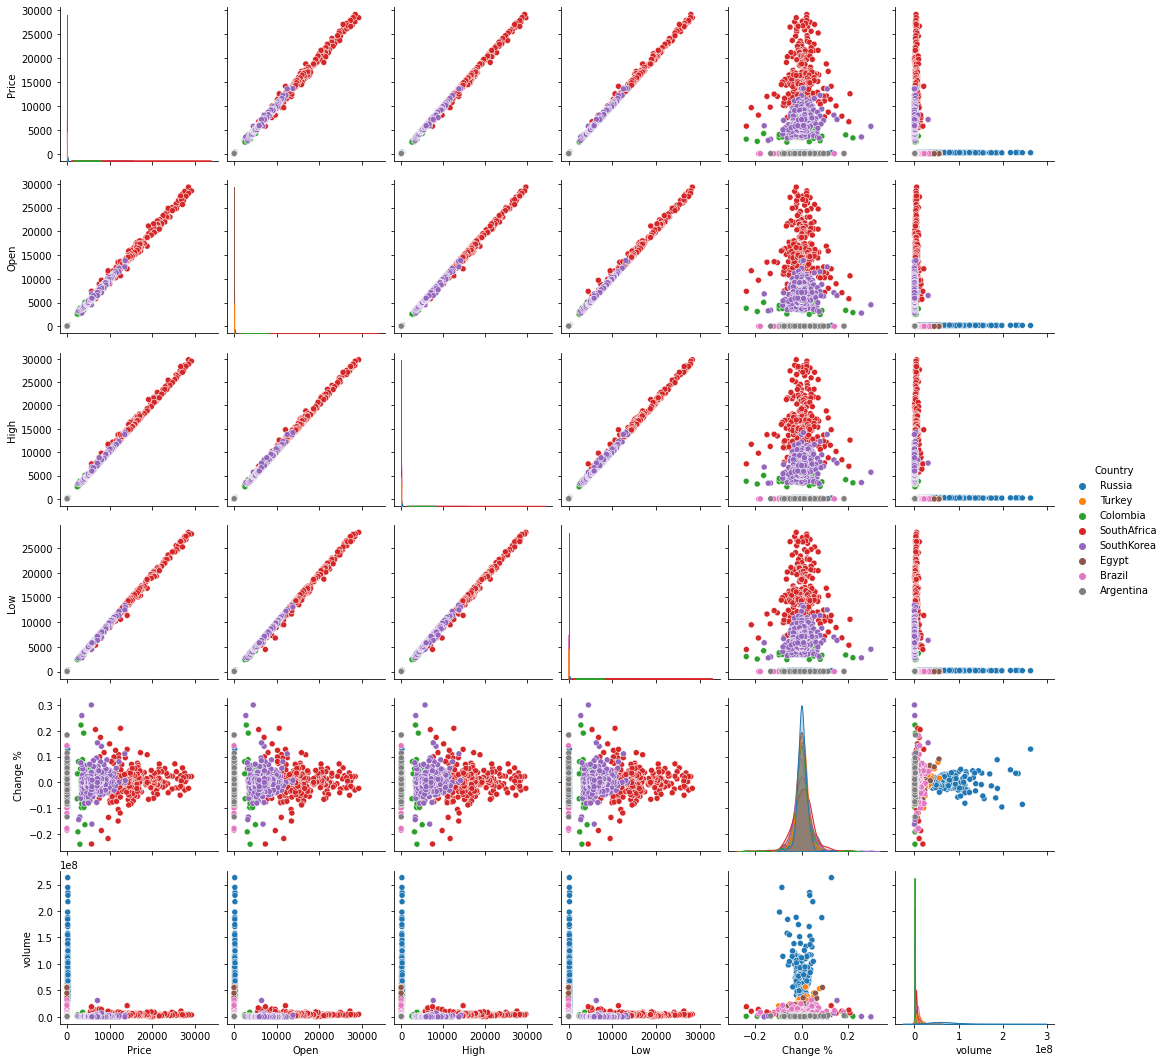

In [53]:
sns.pairplot(df.reset_index(), hue="Country", corner=False)

# 1. EDA Compare daily, weekly and monthly stock price trends

In [89]:
# define new dataframe
co = df[['Price', 'Country']].copy()
co.head(2)

Price Country
Date                      
2021-03-31  291.02  Russia
2021-03-30  293.25  Russia

In [110]:
co.shape

(387, 8)

In [126]:
co.isna().sum()

Country
Argentina      87
Brazil         78
Colombia       84
Egypt          82
Russia         76
SouthAfrica    73
SouthKorea     46
Turkey         72
dtype: int64

In [94]:
co = co.pivot(columns='Country', values= 'Price')
co.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81     NaN      14330.0   
2020-01-03      48.80   12.90    7000.0    NaN   255.0      14843.0   
2020-01-05        NaN     NaN       NaN   4.41     NaN          NaN   
2020-01-06      48.50   12.89       NaN   4.28   253.9      14620.0   
2020-01-07      47.60   13.48    6950.0    NaN     NaN      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0   20.38  
2020-01-03      5900.0   20.30  
2020-01-05         NaN     NaN  
2020-01-06      5730.0   20.08  
2020-01-07      5690.0   19.93

In [95]:
print(co.columns)
print(co.shape)

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey'],
      dtype='object', name='Country')
(387, 8)


In [73]:
co.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-12', '2020-01-13',
               ...
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', length=387, freq=None)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

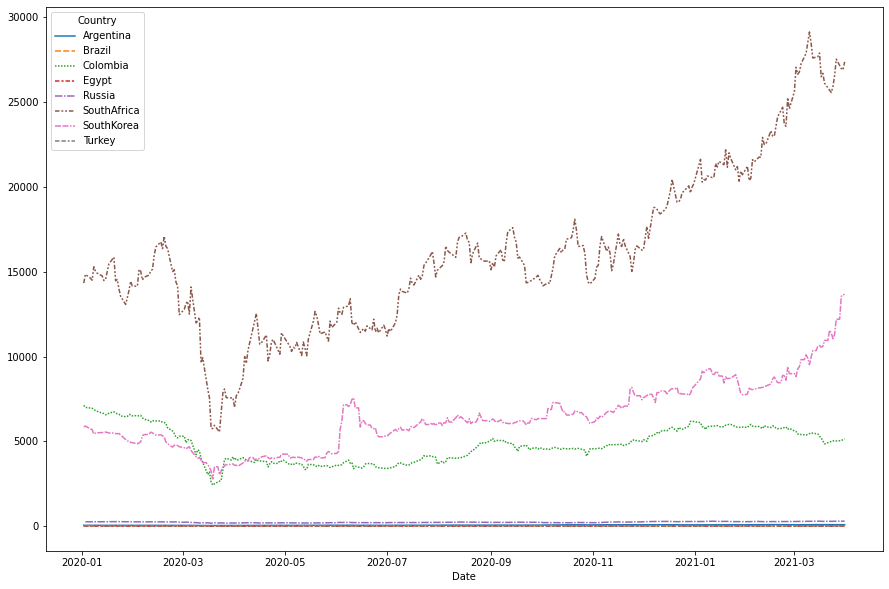

In [74]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

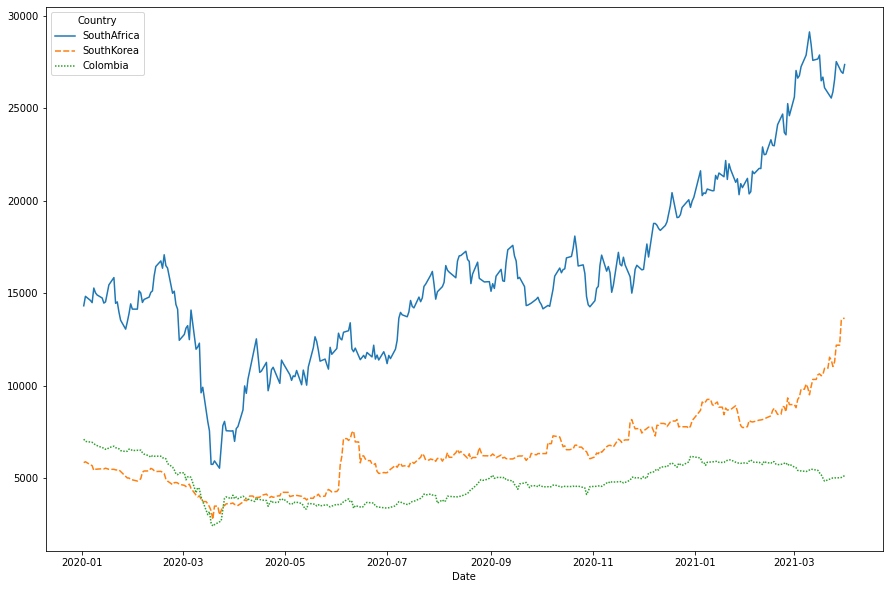

In [75]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[['SouthAfrica','SouthKorea','Colombia']])

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

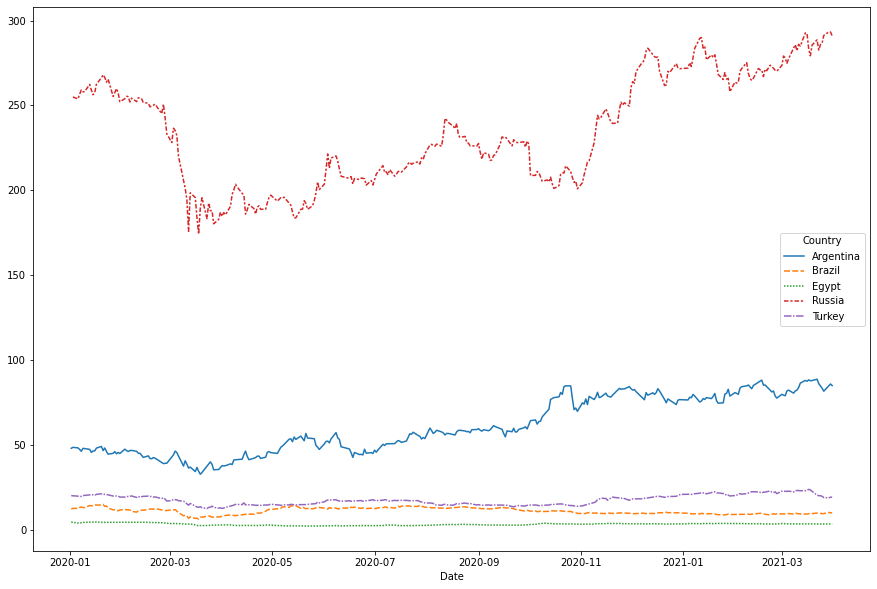

In [76]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[['Argentina', 'Brazil', 'Egypt', 'Russia', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

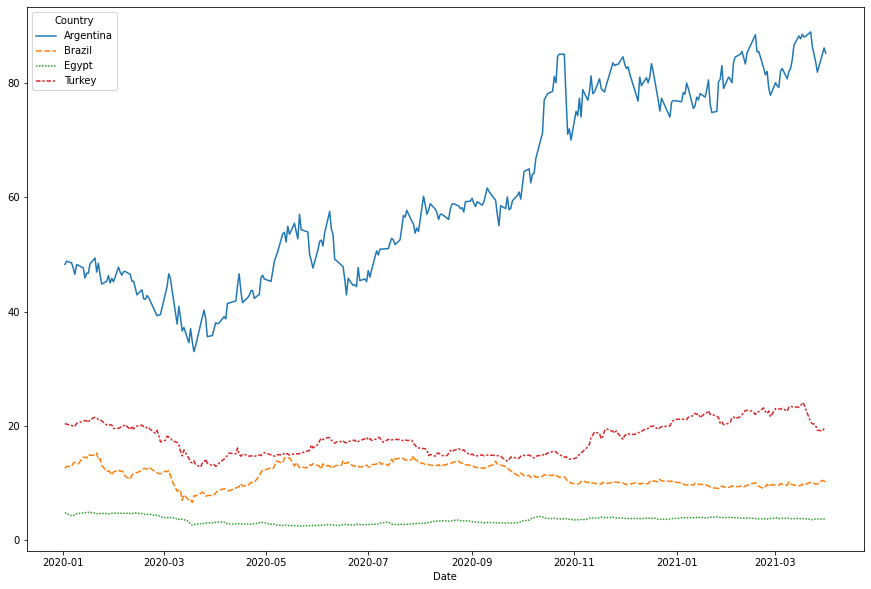

In [77]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[['Argentina', 'Brazil', 'Egypt', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia','Russia',

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

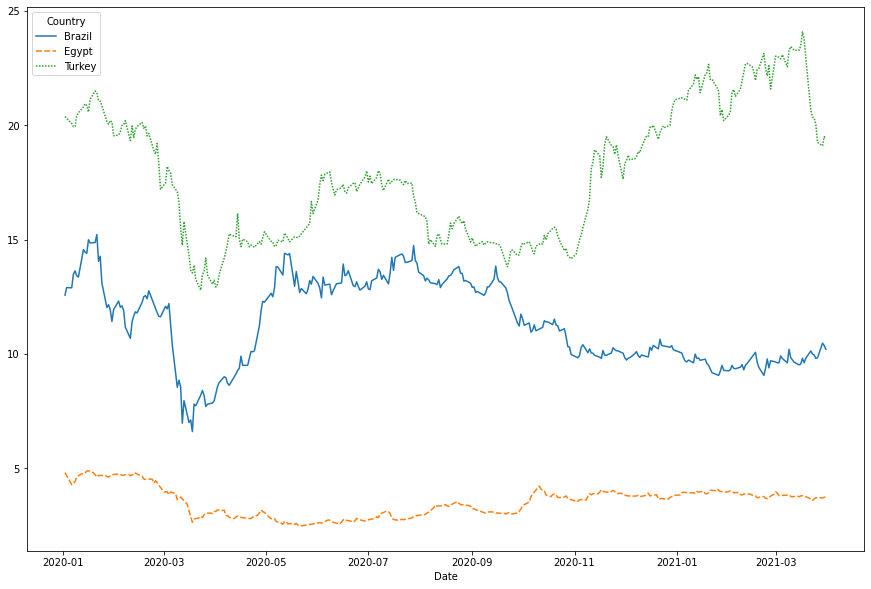

In [78]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[[ 'Brazil', 'Egypt', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia','Russia','Argentina',

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Country', ylabel='Country'>

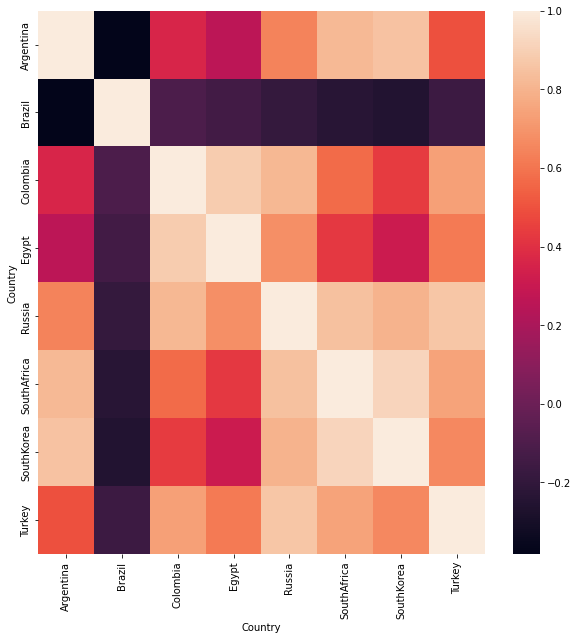

In [87]:
plt.figure(figsize=(10, 10))
sns.heatmap(co.corr())

In [111]:
# compute the average of each week by aggregating the daily data into weekly periods.
#resamples the entire DataFrame to a lower frequency of one week ('W' stands for weekly), taking the mean of each week.
cow = co.resample(rule ='W').mean()
cow.head(2)
cow.shape

Country     Argentina  Brazil  Colombia   Egypt    Russia  SouthAfrica  \
Date                                                                     
2020-01-05     48.525  12.735    7060.0  4.6100  255.0000      14586.5   
2020-01-12     47.780  13.356    6852.5  4.5175  257.3075      14871.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-05      5875.0  20.340  
2020-01-12      5568.0  20.182

(66, 8)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

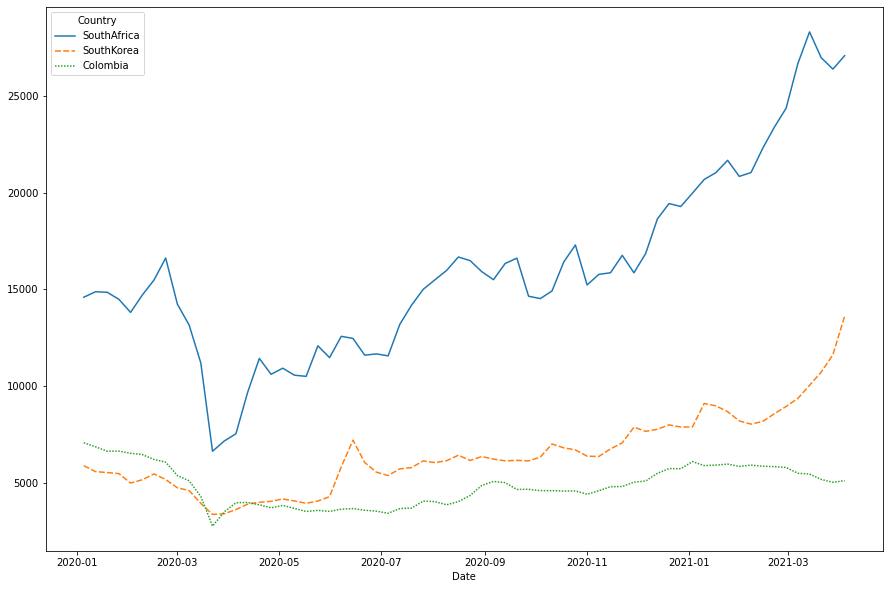

In [112]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = cow[['SouthAfrica','SouthKorea','Colombia']])

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

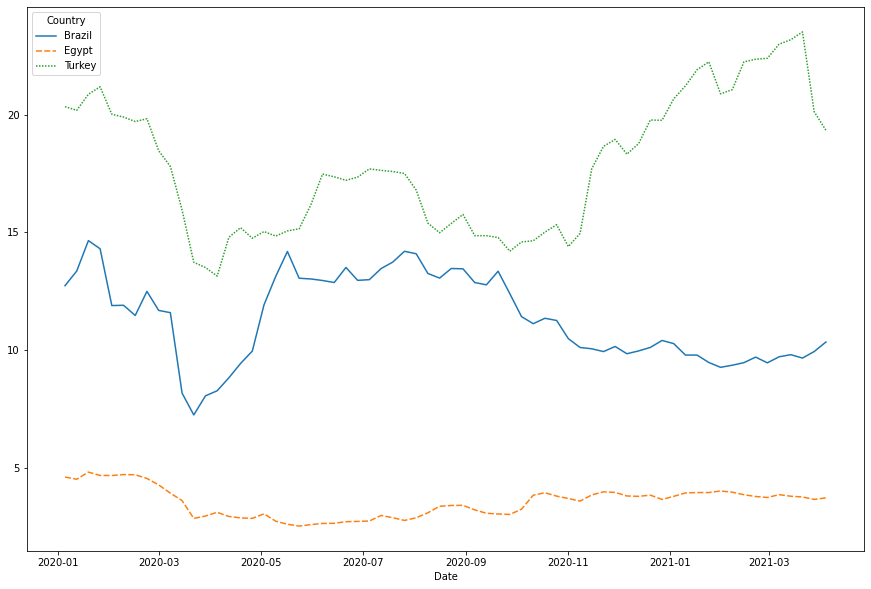

In [113]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = cow[[ 'Brazil', 'Egypt', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia','Russia','Argentina',

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

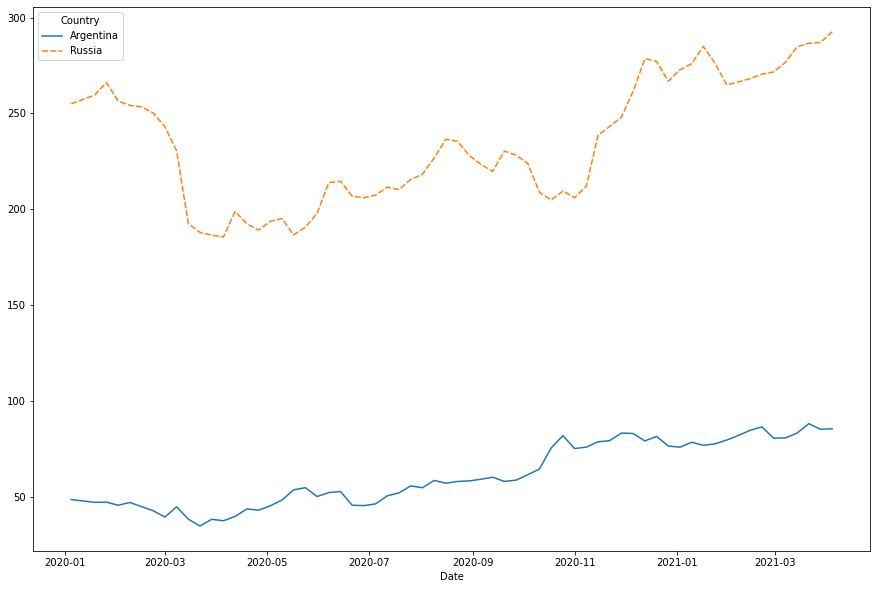

In [114]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = cow[['Argentina', 'Russia']]) # SouthAfrica','SouthKorea','Colombia'

In [115]:
# compute the average of each month by aggregating the daily data into monthly periods.
com = co.resample(rule ='M').mean()
com.head(2)
com.shape

Country     Argentina     Brazil     Colombia   Egypt      Russia  \
Date                                                                
2020-01-31  47.029545  13.475909  6683.333333  4.6710  259.728500   
2020-02-29  43.922222  11.911667  6017.000000  4.6015  250.596842   

Country      SouthAfrica   SouthKorea     Turkey  
Date                                              
2020-01-31  14508.090909  5446.750000  20.540455  
2020-02-29  15255.450000  5120.952381  19.474000

(15, 8)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

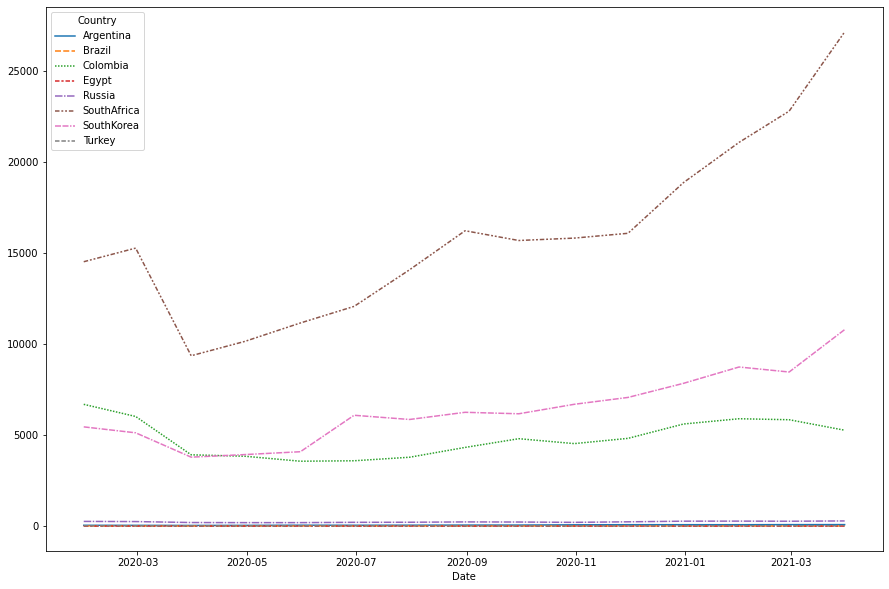

In [116]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=com)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Price'>

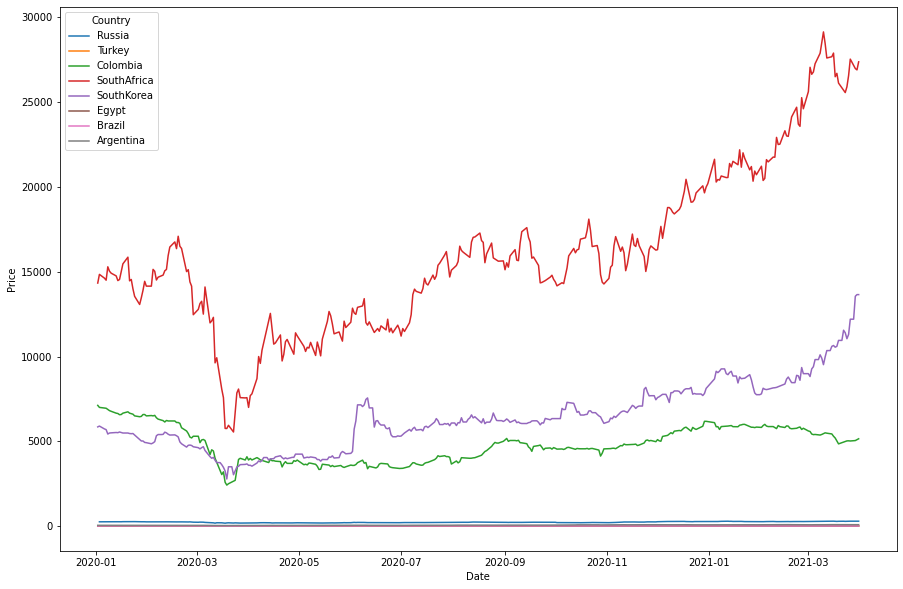

In [117]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'Price', hue="Country")

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Open'>

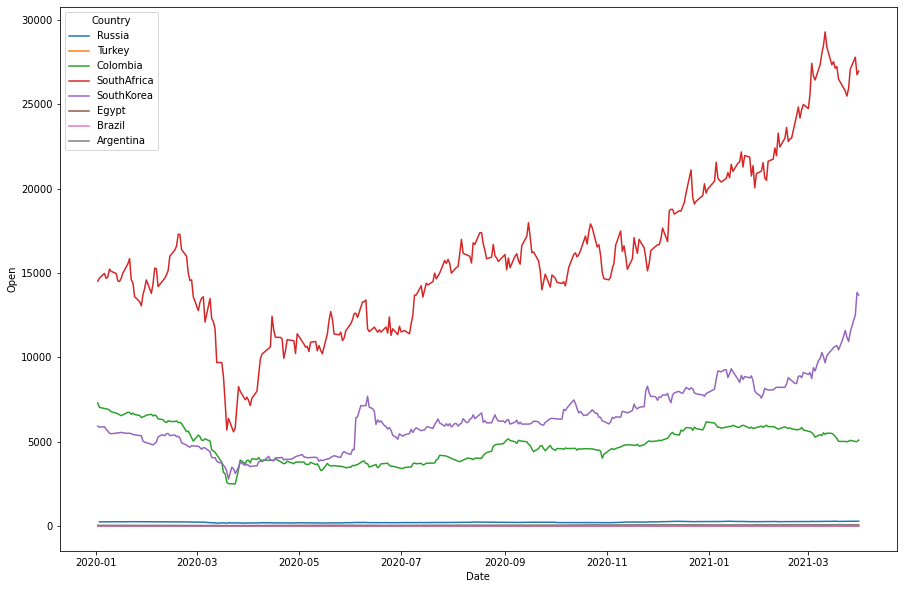

In [118]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'Open', hue="Country")

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='High'>

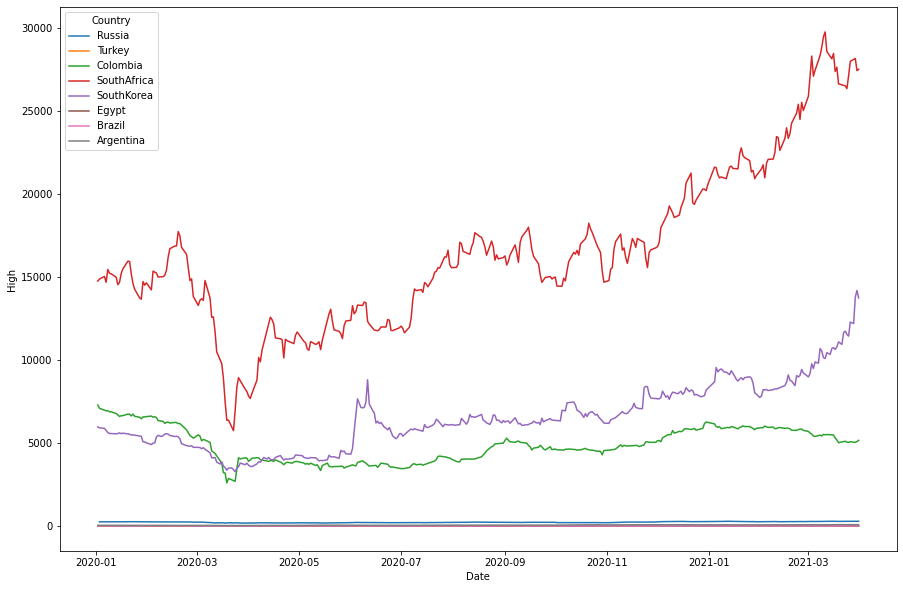

In [119]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'High', hue="Country")

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Low'>

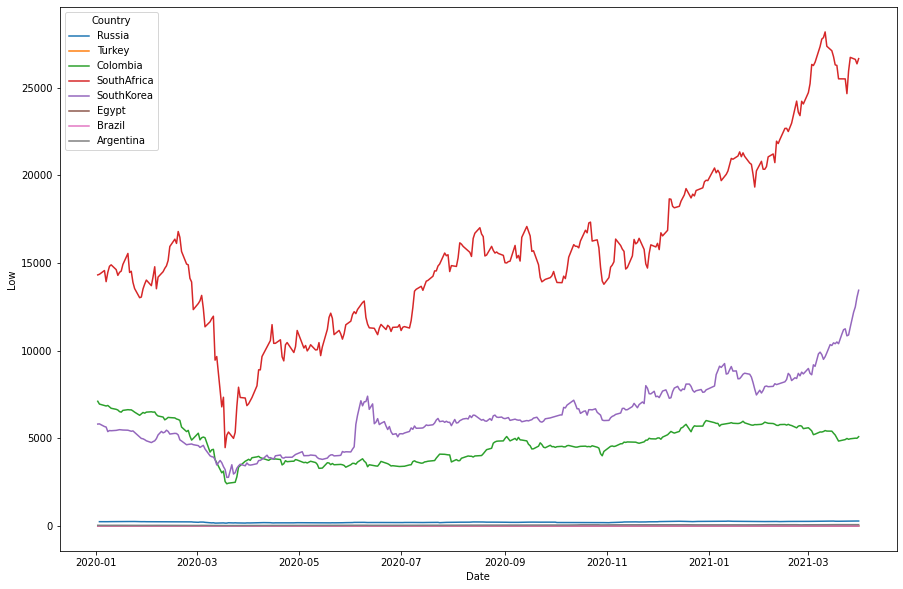

In [120]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'Low', hue="Country")

In [121]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Change %', 'Country', 'volume',
       'shifted', 'change', 'return', 'pct_return_3d'],
      dtype='object')

# Get retruns for stock price series

In the context of stock prices, return refers to the percentage change in the price of a stock over a given time period. 

It measures how much money an investor has gained or lost on their investment in that stock during the period.

The formula for calculating the return is:

Return = (Current Price - Initial Price) / Initial Price * 100%

where:

Current Price: the price of the stock at the end of the time period
Initial Price: the price of the stock at the beginning of the time period
For example, suppose an investor bought a stock for $50 and sold it for $60 after one year. The return on the investment would be:

Return = ($60 - $50) / $50 * 100% = 20%

This means that the investor gained a 20% return on their investment over the one-year period.

In general, the return on a stock can be positive, negative, or zero, depending on whether the price increased, decreased, or stayed the same over the time period. Investors use returns to measure the performance of their investments and compare them to other investment opportunities.

In [106]:
#df['lagged']=df.Price.shift(periods = -1) # the lagged version (in past)
df['shifted']=df.Price.shift() # default 1
df.head(3)

Price    Open    High     Low  Change % Country      volume  \
Date                                                                       
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0   
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0   
2021-03-29  293.30  289.72  294.09  289.26    0.0071  Russia  43680000.0   

            shifted  
Date                 
2021-03-31      NaN  
2021-03-30   291.02  
2021-03-29   293.25

In [107]:
# calculate one period percent change
df['change'] = df.Price.div(df.shifted)
df[['Price', 'shifted', 'change']].head()

Price  shifted    change
Date                                 
2021-03-31  291.02      NaN       NaN
2021-03-30  293.25   291.02  1.007663
2021-03-29  293.30   293.25  1.000171
2021-03-26  291.22   293.30  0.992908
2021-03-25  286.66   291.22  0.984342

In [108]:
# relative change in percentage return 
df['return']= df.change.sub(1).mul(100)
df[['Price', 'shifted', 'change', 'return']].head()

Price  shifted    change    return
Date                                           
2021-03-31  291.02      NaN       NaN       NaN
2021-03-30  293.25   291.02  1.007663  0.766270
2021-03-29  293.30   293.25  1.000171  0.017050
2021-03-26  291.22   293.30  0.992908 -0.709171
2021-03-25  286.66   291.22  0.984342 -1.565827

In [109]:
# anaother to get the percentage change return (periode of 3)
df['pct_return_3d'] = df.Price.pct_change(periods= 1).mul(100)
df[['Price', 'shifted', 'change', 'return', 'pct_return_3d']].head()

Price  shifted    change    return  pct_return_3d
Date                                                          
2021-03-31  291.02      NaN       NaN       NaN            NaN
2021-03-30  293.25   291.02  1.007663  0.766270       0.766270
2021-03-29  293.30   293.25  1.000171  0.017050       0.017050
2021-03-26  291.22   293.30  0.992908 -0.709171      -0.709171
2021-03-25  286.66   291.22  0.984342 -1.565827      -1.565827

In [ ]:
#Use .asfreq() to set the frequency of google to business daily.
#dftry = dftry.asfreq('B')

# EDA     Compare Return (daily , weekly and monthly)

In [131]:
re = df[['Price', 'Country']].copy()
re.head(2)

Price Country
Date                      
2021-03-31  291.02  Russia
2021-03-30  293.25  Russia

In [132]:
re = re.pivot(columns='Country', values= 'Price')
re.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81     NaN      14330.0   
2020-01-03      48.80   12.90    7000.0    NaN   255.0      14843.0   
2020-01-05        NaN     NaN       NaN   4.41     NaN          NaN   
2020-01-06      48.50   12.89       NaN   4.28   253.9      14620.0   
2020-01-07      47.60   13.48    6950.0    NaN     NaN      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0   20.38  
2020-01-03      5900.0   20.30  
2020-01-05         NaN     NaN  
2020-01-06      5730.0   20.08  
2020-01-07      5690.0   19.93

In [133]:
re.isnull().sum()

Country
Argentina      87
Brazil         78
Colombia       84
Egypt          82
Russia         76
SouthAfrica    73
SouthKorea     46
Turkey         72
dtype: int64

In [134]:
# repalce missing value wiht bacck fill 
re.bfill(inplace=True)

In [135]:
re.isnull().sum()

Country
Argentina      0
Brazil         0
Colombia       0
Egypt          0
Russia         0
SouthAfrica    0
SouthKorea     0
Turkey         0
dtype: int64

In [136]:
re.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey'],
      dtype='object', name='Country')

In [141]:
for col in re.columns:
  # Create daily_return
  re[col+'_d'] = re[col].pct_change(periods=1).mul(100)
    # Create weekly_return
  re[col+'_w'] = re[col].pct_change(periods=7).mul(100)
  # Create monthly_return
  re[col+'_m'] = re[col].pct_change(periods=30).mul(100)
  # Create annual_return
  re[col+'_a'] = re[col].pct_change(periods=360).mul(100)
re.head(2)

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81   255.0      14330.0   
2020-01-03      48.80   12.90    7000.0   4.41   255.0      14843.0   

Country     SouthKorea  Turkey  Argentina_d  Argentina_w  Argentina_m  \
Date                                                                    
2020-01-02      5850.0   20.38          NaN          NaN          NaN   
2020-01-03      5900.0   20.30     1.139896          NaN          NaN   

Country     Brazil_d  Brazil_w  Brazil_m  Colombia_d  Colombia_w  Colombia_m  \
Date                                                                           
2020-01-02       NaN       NaN       NaN         NaN         NaN         NaN   
2020-01-03  2.625298       NaN       NaN   -1.685393         NaN         NaN   

Country      Egypt_d  Egypt_w  Egypt_m  Russia_d  Russia_w  Russia_m  \
Date                                                                   
2020-01-02       NaN      NaN      NaN       NaN       NaN       NaN   
2020-01-03 -8.316008      NaN      NaN       0.0       NaN       NaN   

Country     SouthAfrica_d  SouthAfrica_w  SouthAfrica_m  SouthKorea_d  \
Date                                                                    
2020-01-02            NaN            NaN            NaN           NaN   
2020-01-03       3.579902            NaN            NaN      0.854701   

Country     SouthKorea_w  SouthKorea_m  Turkey_d  Turkey_w  Turkey_m  \
Date                                                                   
2020-01-02           NaN           NaN       NaN       NaN       NaN   
2020-01-03           NaN           NaN -0.392542       NaN       NaN   

Country     Argentina_a  Brazil_a  Colombia_a  Egypt_a  Russia_a  \
Date                                                               
2020-01-02          NaN       NaN         NaN      NaN       NaN   
2020-01-03          NaN       NaN         NaN      NaN       NaN   

Country     SouthAfrica_a  SouthKorea_a  Turkey_a  Argentina_d_d  \
Date                                                               
2020-01-02            NaN           NaN       NaN            NaN   
2020-01-03            NaN           NaN       NaN            NaN   

Country     Argentina_d_w  Argentina_d_m  Argentina_d_a  Argentina_w_d  \
Date                                                                     
2020-01-02            NaN            NaN            NaN            NaN   
2020-01-03            NaN            NaN            NaN            NaN   

Country     Argentina_w_w  Argentina_w_m  Argentina_w_a  Argentina_m_d  \
Date                                                                     
2020-01-02            NaN            NaN            NaN            NaN   
2020-01-03            NaN            NaN            NaN            NaN   

Country     Argentina_m_w  Argentina_m_m  Argentina_m_a  Brazil_d_d  \
Date                                                                  
2020-01-02            NaN            NaN            NaN         NaN   
2020-01-03            NaN            NaN            NaN         NaN   

Country     Brazil_d_w  Brazil_d_m  Brazil_d_a  Brazil_w_d  Brazil_w_w  \
Date                                                                     
2020-01-02         NaN         NaN         NaN         NaN         NaN   
2020-01-03         NaN         NaN         NaN         NaN         NaN   

Country     Brazil_w_m  Brazil_w_a  Brazil_m_d  Brazil_m_w  Brazil_m_m  \
Date                                                                     
2020-01-02         NaN         NaN         NaN         NaN         NaN   
2020-01-03         NaN         NaN         NaN         NaN         NaN   

Country     Brazil_m_a  Colombia_d_d  Colombia_d_w  Colombia_d_m  \
Date                                                               
2020-01-02         NaN           NaN           NaN           NaN   
2020-01

In [138]:
re.isna().sum()

Country
Argentina         0
Brazil            0
Colombia          0
Egypt             0
Russia            0
SouthAfrica       0
SouthKorea        0
Turkey            0
Argentina_d       1
Argentina_w       7
Argentina_m      30
Brazil_d          1
Brazil_w          7
Brazil_m         30
Colombia_d        1
Colombia_w        7
Colombia_m       30
Egypt_d           1
Egypt_w           7
Egypt_m          30
Russia_d          1
Russia_w          7
Russia_m         30
SouthAfrica_d     1
SouthAfrica_w     7
SouthAfrica_m    30
SouthKorea_d      1
SouthKorea_w      7
SouthKorea_m     30
Turkey_d          1
Turkey_w          7
Turkey_m         30
dtype: int64

In [ ]:
re.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey', 'Argentina_d', 'Argentina_w', 'Argentina_m',
       'Argentina_a', 'Brazil_d', 'Brazil_w', 'Brazil_m', 'Brazil_a',
       'Colombia_d', 'Colombia_w', 'Colombia_m', 'Colombia_a', 'Egypt_d',
       'Egypt_w', 'Egypt_m', 'Egypt_a', 'Russia_d', 'Russia_w', 'Russia_m',
       'Russia_a', 'SouthAfrica_d', 'SouthAfrica_w', 'SouthAfrica_m',
       'SouthAfrica_a', 'SouthKorea_d', 'SouthKorea_w', 'SouthKorea_m',
       'SouthKorea_a', 'Turkey_d', 'Turkey_w', 'Turkey_m', 'Turkey_a'],
      dtype='object', name='Country')

In [139]:
re[['Argentina_m', 'Brazil_m', 'Egypt_m', 'Russia_m', 'Turkey_m', 'SouthAfrica_m','SouthKorea_m','Colombia_m']].isna().sum()

Country
Argentina_m      30
Brazil_m         30
Egypt_m          30
Russia_m         30
Turkey_m         30
SouthAfrica_m    30
SouthKorea_m     30
Colombia_m       30
dtype: int64

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

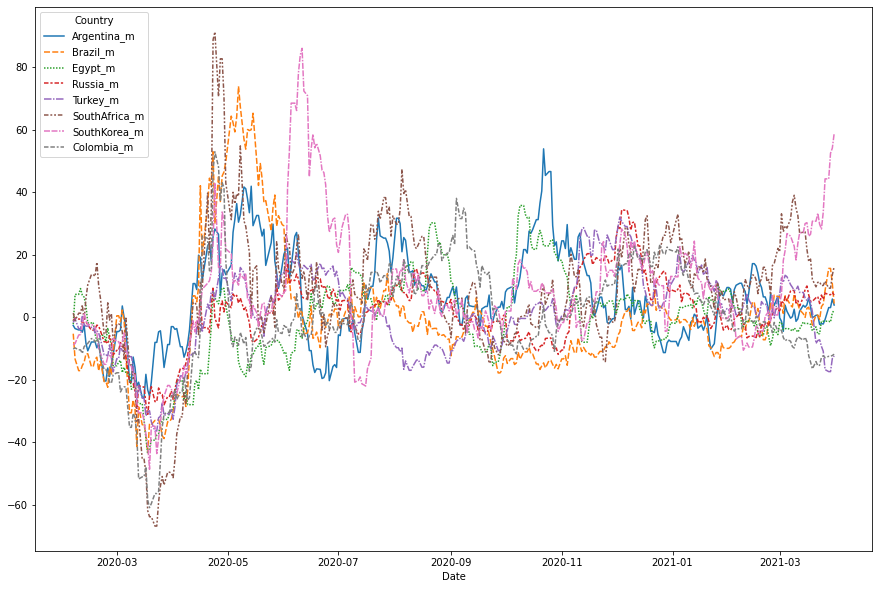

In [140]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'Brazil_m', 'Egypt_m', 'Russia_m', 'Turkey_m', 'SouthAfrica_m','SouthKorea_m','Colombia_m']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

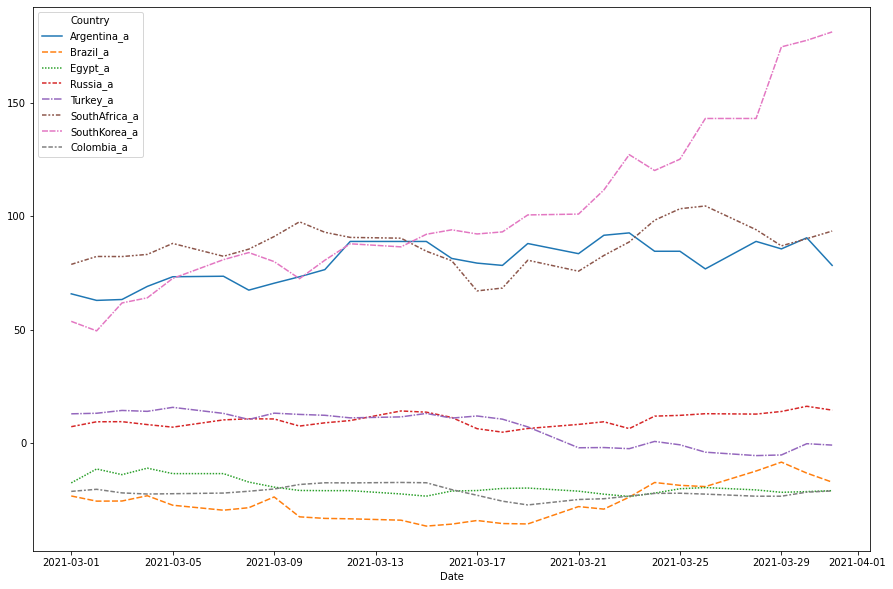

In [142]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_a', 'Brazil_a', 'Egypt_a', 'Russia_a', 'Turkey_a', 'SouthAfrica_a','SouthKorea_a','Colombia_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

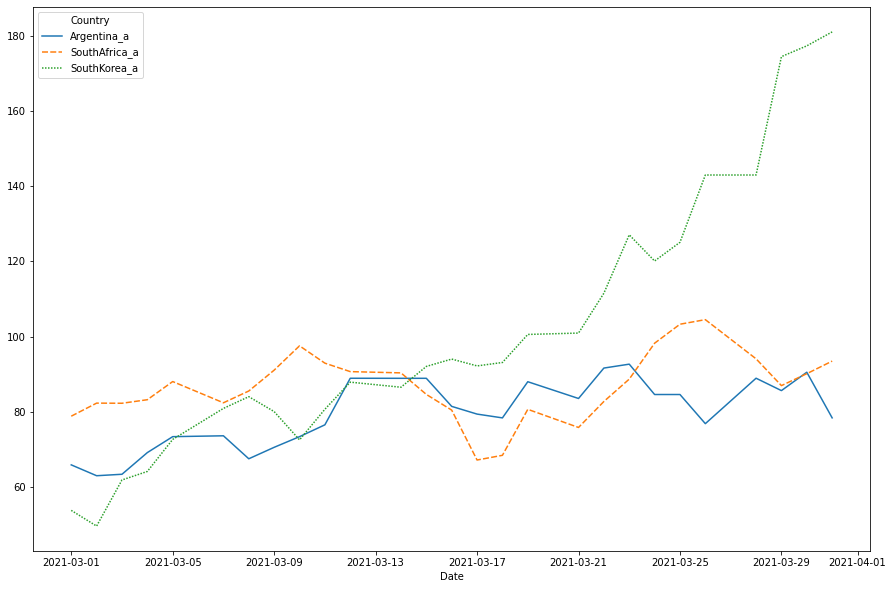

In [146]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_a', 'SouthAfrica_a','SouthKorea_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

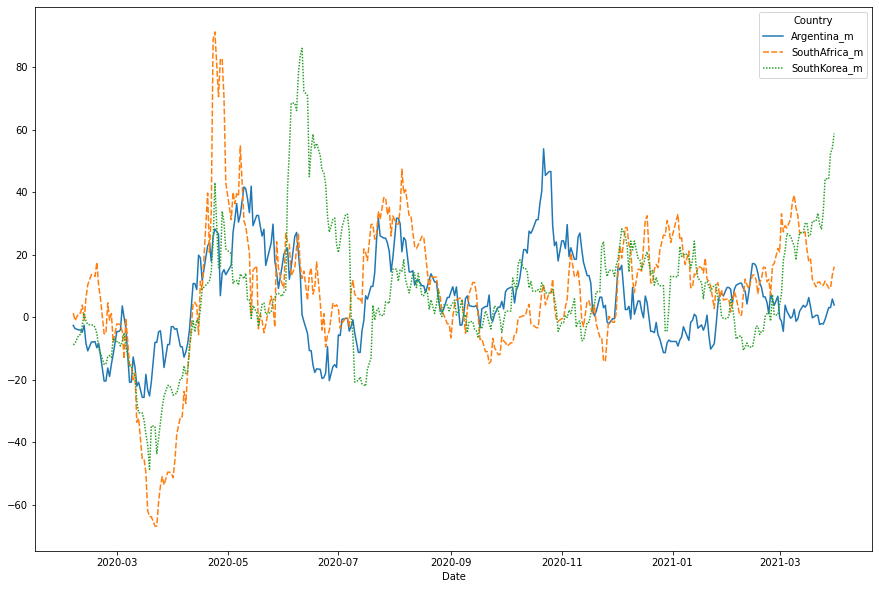

In [143]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'SouthAfrica_m','SouthKorea_m']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

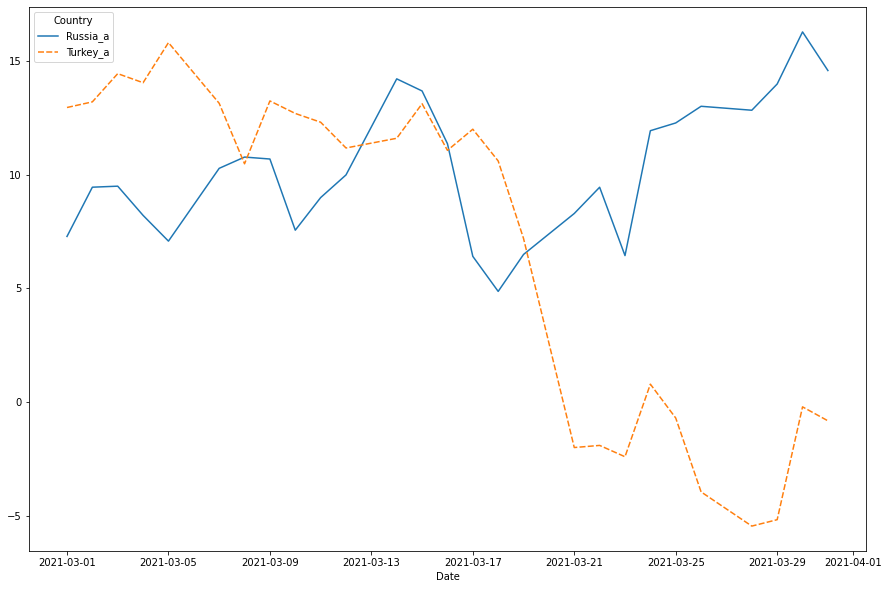

In [147]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Russia_a', 'Turkey_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

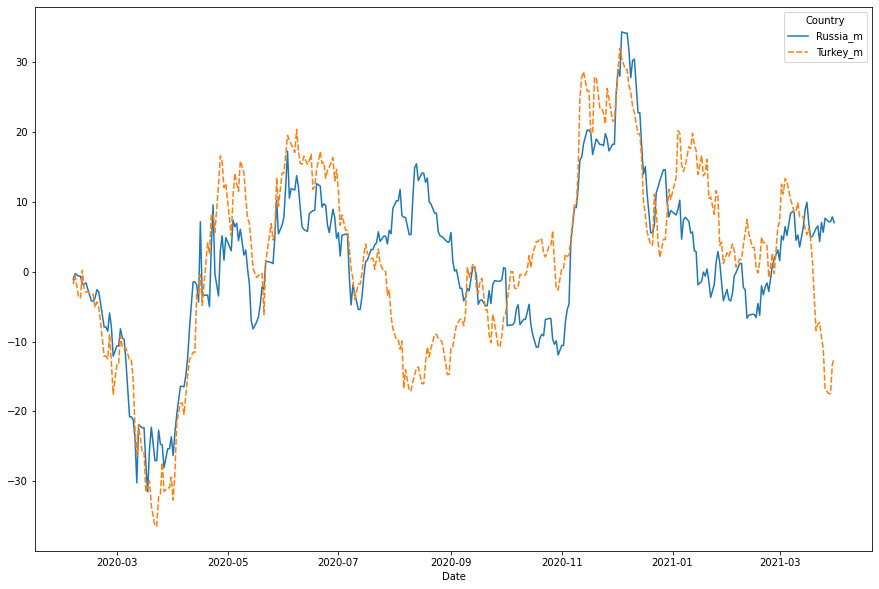

In [144]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Russia_m', 'Turkey_m']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

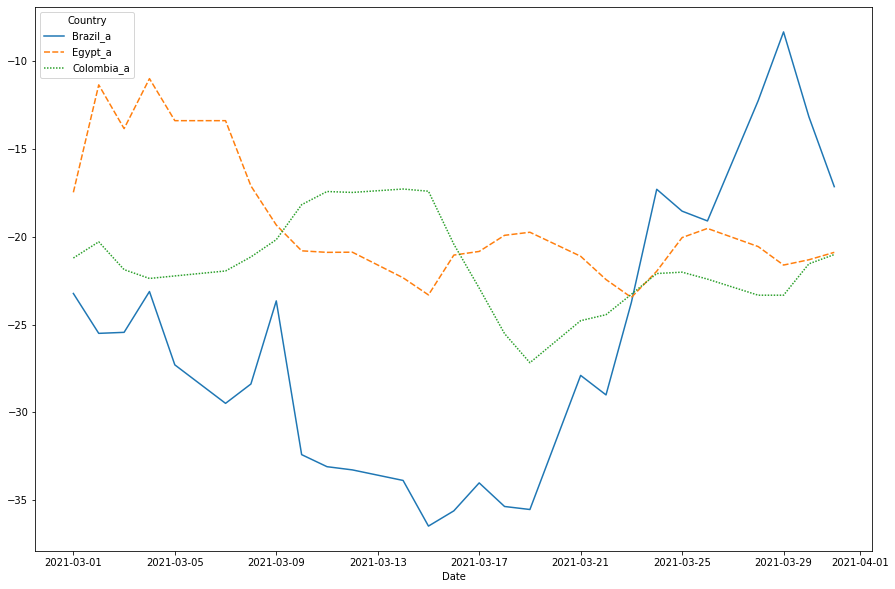

In [148]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Brazil_a', 'Egypt_a' ,'Colombia_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

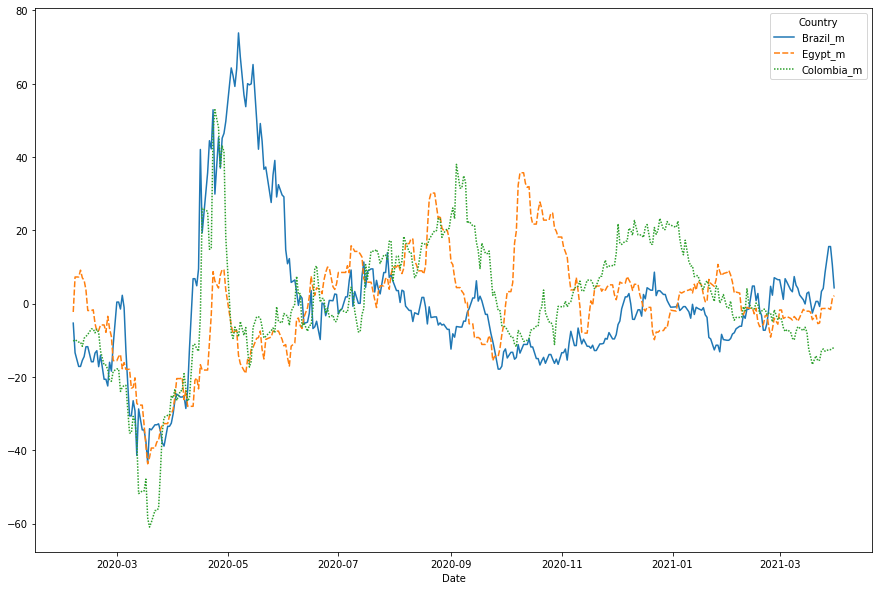

In [149]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Brazil_m', 'Egypt_m' ,'Colombia_m']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

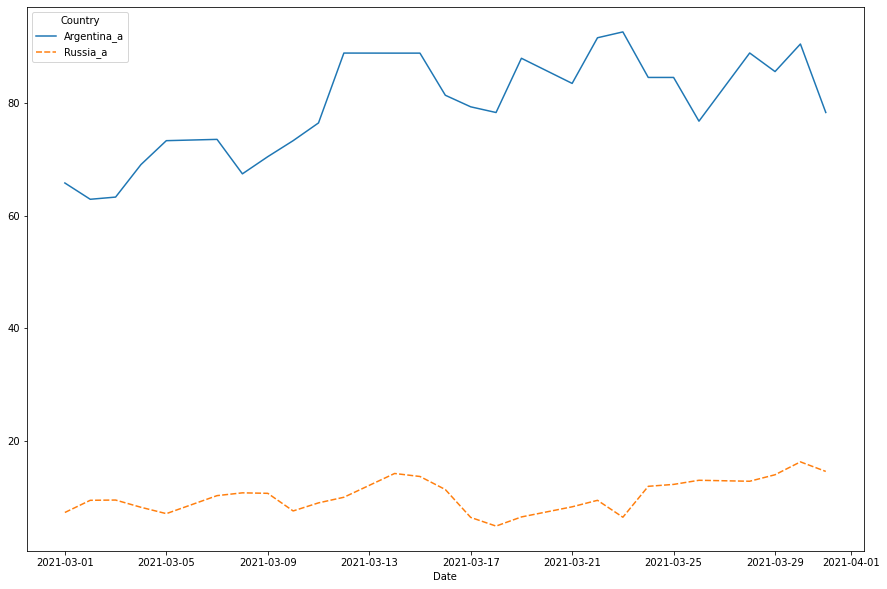

In [150]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_a', 'Russia_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

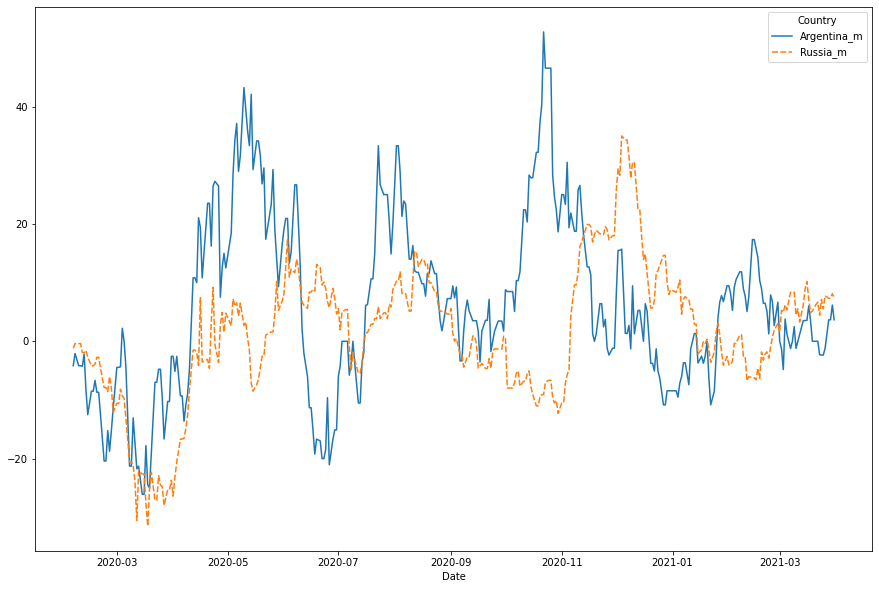

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'Russia_m']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

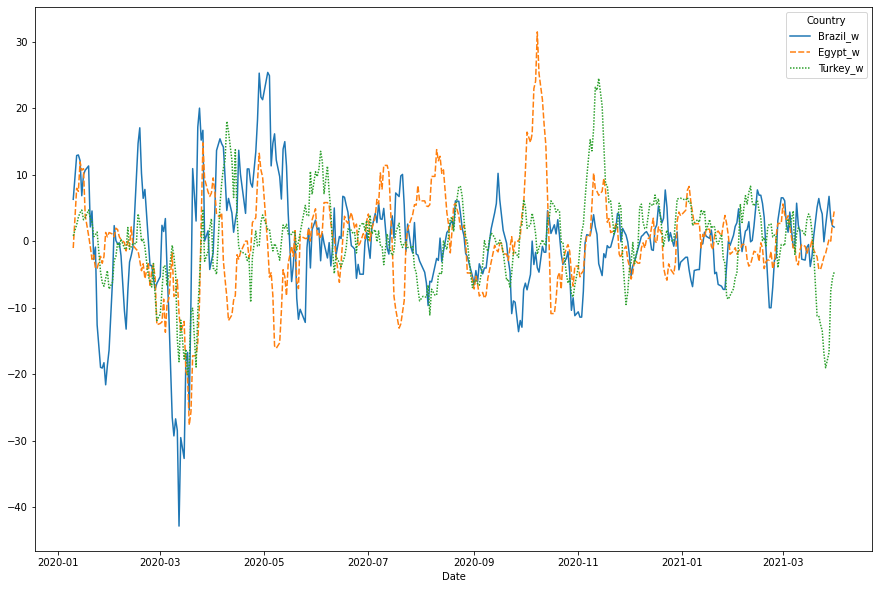

In [151]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[[ 'Brazil_w', 'Egypt_w', 'Turkey_w']]) # SouthAfrica','SouthKorea','Colombia','Russia','Argentina',

<Figure size 1080x720 with 0 Axes>

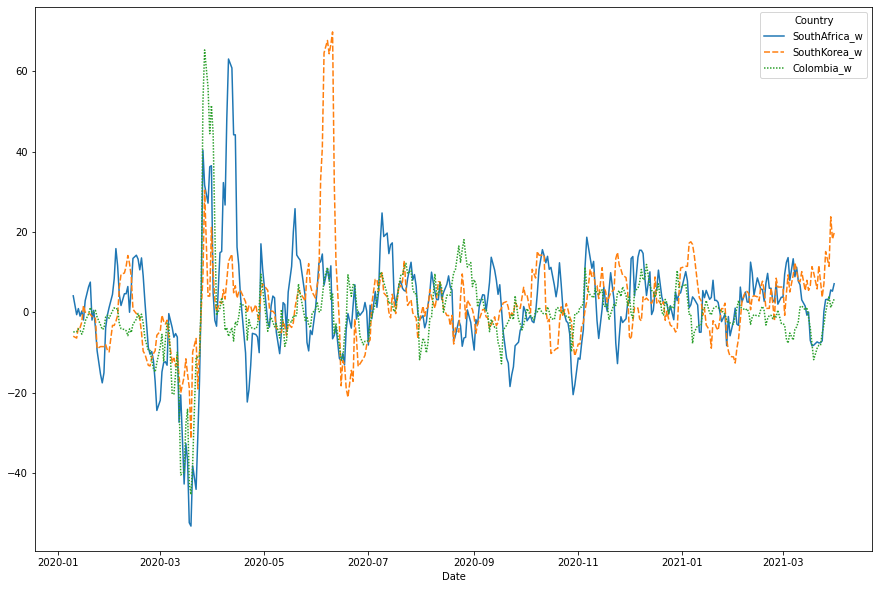

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['SouthAfrica_w','SouthKorea_w','Colombia_w']])

<Figure size 1080x720 with 0 Axes>

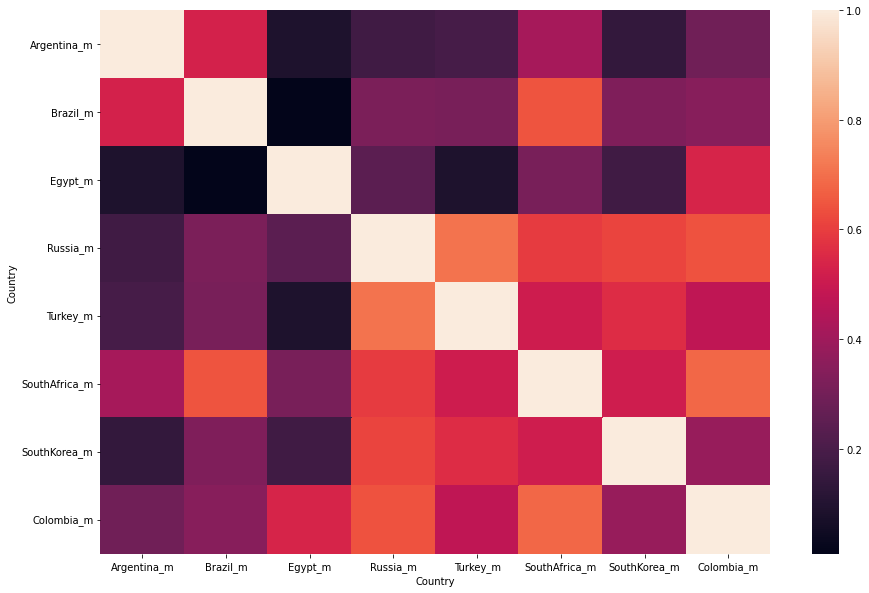

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data = re[['Argentina_m', 'Brazil_m', 'Egypt_m', 'Russia_m', 'Turkey_m', 'SouthAfrica_m','SouthKorea_m','Colombia_m']].corr())

<Figure size 1080x720 with 0 Axes>

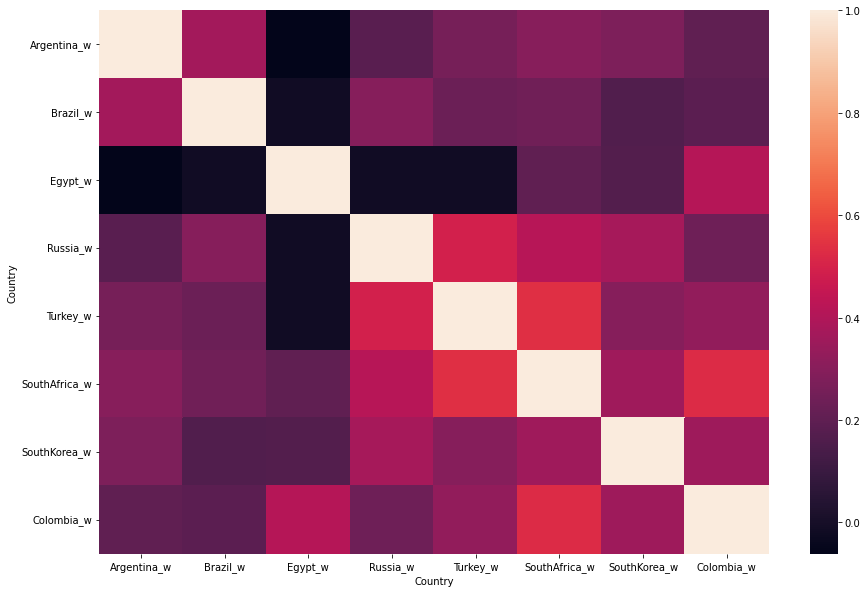

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data = re[['Argentina_w', 'Brazil_w', 'Egypt_w', 'Russia_w', 'Turkey_w', 'SouthAfrica_w','SouthKorea_w','Colombia_w']].corr())

# EDA Price Open High Low in each Country




In [ ]:
# convert daily data to weekly data 
#df.resample(rule="W").last()

In [153]:
df.head(2)

Price    Open    High     Low  Change % Country      volume  \
Date                                                                       
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0   
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0   

            shifted    change   return  pct_return_3d  
Date                                                   
2021-03-31      NaN       NaN      NaN            NaN  
2021-03-30   291.02  1.007663  0.76627        0.76627

In [156]:
df2 = df[['Price', 'Country','Open', 'High', 'Low', 'volume']].copy()
df2.head(2)

Price Country    Open    High     Low      volume
Date                                                          
2021-03-31  291.02  Russia  294.00  294.42  290.26  47000000.0
2021-03-30  293.25  Russia  294.86  295.72  291.50  38810000.0

In [ ]:
df2.Country.unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

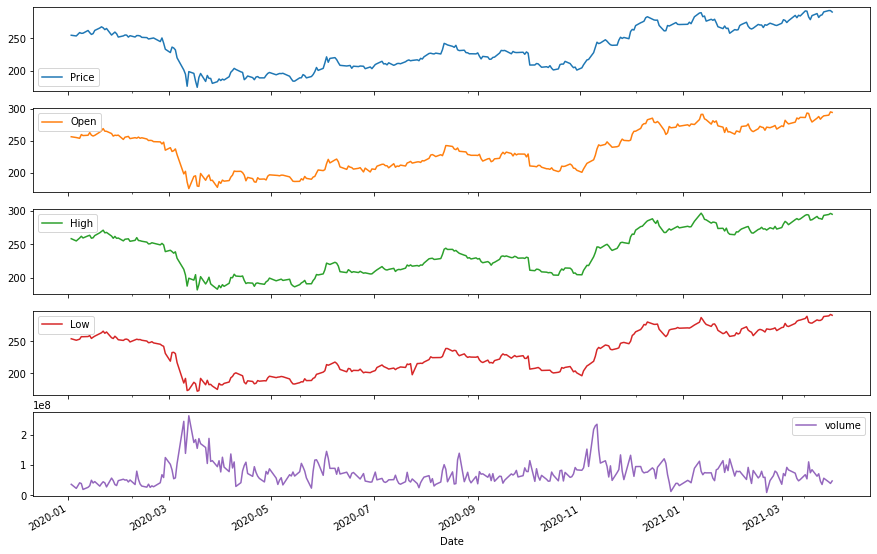

In [157]:
df2[df2['Country']=='Russia'].plot(subplots = True, figsize =(15, 10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

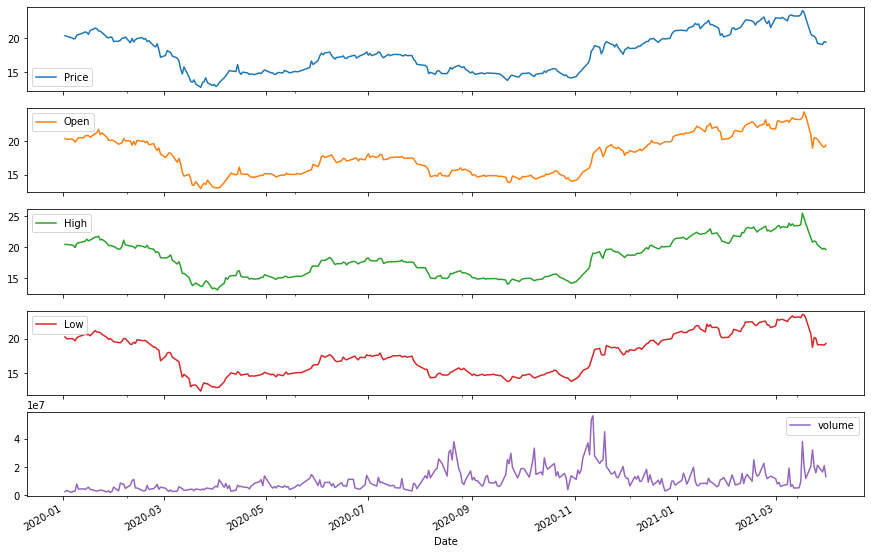

In [159]:
df2[df2['Country']=='Turkey'].plot(subplots = True, figsize =(15, 10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

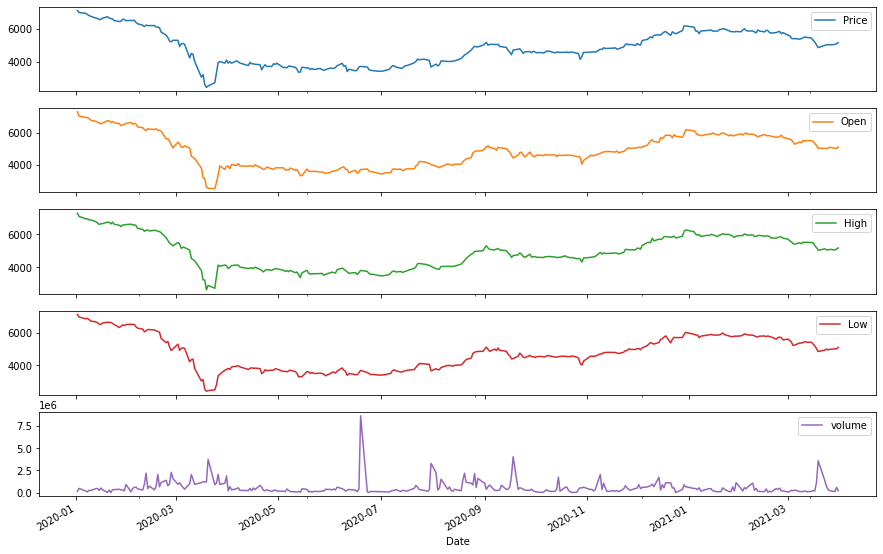

In [160]:
df2[df2['Country']=='Colombia'].plot(subplots = True, figsize =(15, 10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

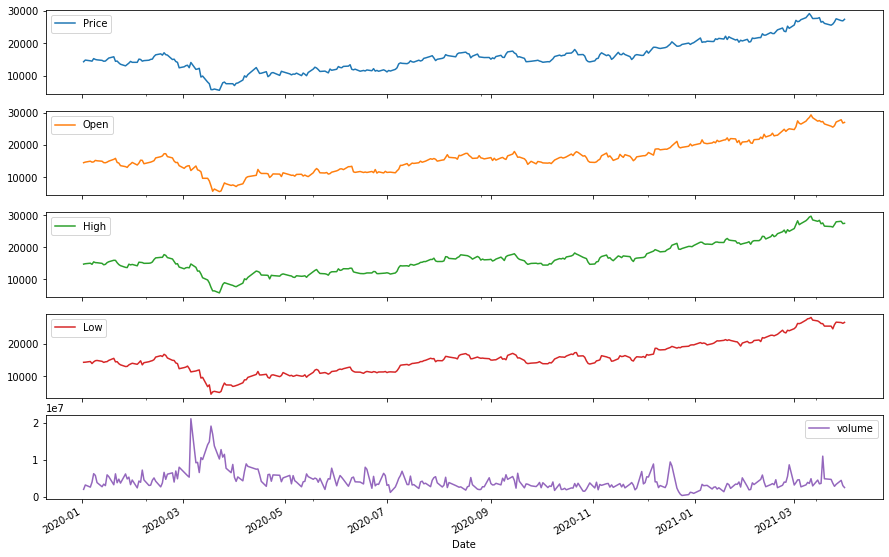

In [161]:
df2[df2['Country']=='SouthAfrica'].plot(subplots = True, figsize =(15, 10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

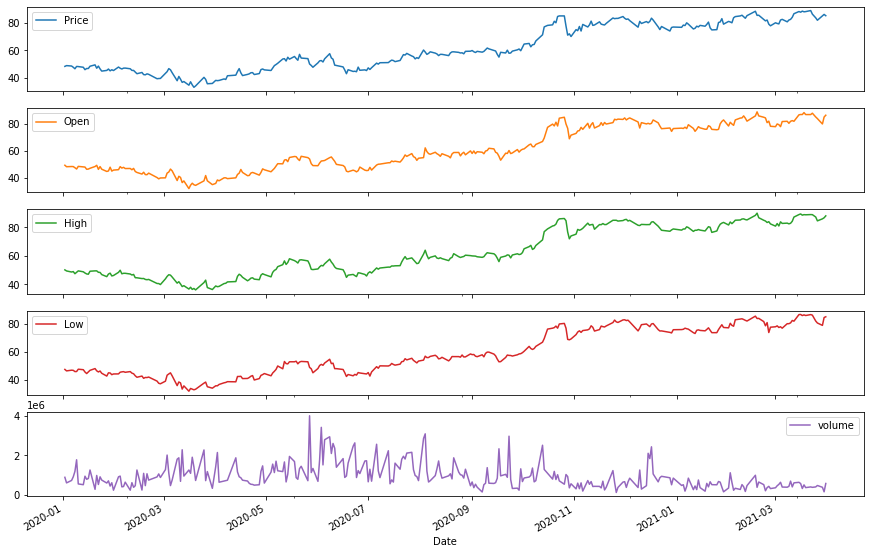

In [162]:
df2[df2['Country']=='Argentina'].plot(subplots = True, figsize =(15, 10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

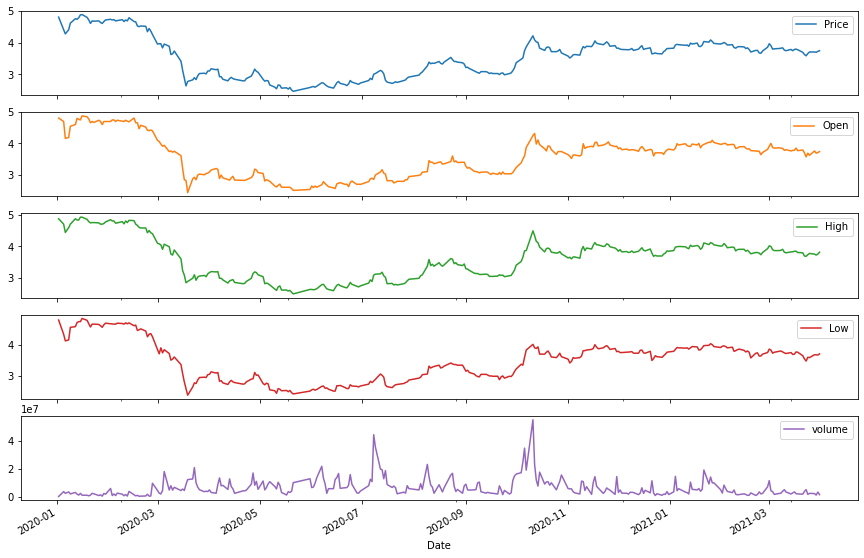

In [163]:
df2[df2['Country']=='Egypt'].plot(subplots = True, figsize =(15, 10))

# Are Interest Rates Autocorrelated?

In [ ]:
df2 = df[['Price', 'Country', 'Open', 'High', 'Low', 'Vol.']]

In [ ]:
df2['Price_return'] = df2['Price'].pct_change().mul(100)# return 
# Compute the daily change in interest rates 
df2['price_diff'] = df2['Price'].diff()
df2.head()

Price Country  Open  High  Low    Vol.  Price_return  price_diff
Date                                                                        
2021-03-31    291  Russia   294   294  290  47.00M           NaN         NaN
2021-03-30    293  Russia   294   295  291  38.81M      0.687285         2.0
2021-03-29    293  Russia   289   294  289  43.68M      0.000000         0.0
2021-03-26    291  Russia   288   292  288  56.07M     -0.682594        -2.0
2021-03-25    286  Russia   286   287  283  35.22M     -1.718213        -5.0

In [ ]:
#df2['shifted']=df2.Price.shift() # default 1
#df2['change'] = df2.Price.div(df2.shifted)
#df2['return']= df2.change.sub(1).mul(100)

In [ ]:
Interest = df[['Price', 'Country']]
Interest = Interest.pivot(columns='Country', values= 'Price')
Interest.bfill(inplace=True)
Interest.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02       48.0    12.0    7120.0    4.0   255.0      14330.0   
2020-01-03       48.0    12.0    7000.0    4.0   255.0      14843.0   
2020-01-05       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-06       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-07       47.0    13.0    6950.0    4.0   259.0      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0    20.0  
2020-01-03      5900.0    20.0  
2020-01-05      5730.0    20.0  
2020-01-06      5730.0    20.0  
2020-01-07      5690.0    19.0

In [ ]:
for col in Interest.columns:
  # Compute the daily change in interest rates 
  Interest[col+'_int'] = Interest[col].diff()

In [ ]:
Interest.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02       48.0    12.0    7120.0    4.0   255.0      14330.0   
2020-01-03       48.0    12.0    7000.0    4.0   255.0      14843.0   
2020-01-05       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-06       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-07       47.0    13.0    6950.0    4.0   259.0      14500.0   

Country     SouthKorea  Turkey  Argentina_int  Brazil_int  Colombia_int  \
Date                                                                      
2020-01-02      5850.0    20.0            NaN         NaN           NaN   
2020-01-03      5900.0    20.0            0.0         0.0        -120.0   
2020-01-05      5730.0    20.0            0.0         0.0         -50.0   
2020-01-06      5730.0    20.0            0.0         0.0           0.0   
2020-01-07      5690.0    19.0           -1.0         1.0           0.0   

Country     Egypt_int  Russia_int  SouthAfrica_int  SouthKorea_int  Turkey_int  
Date                                                                            
2020-01-02        NaN         NaN              NaN             NaN         NaN  
2020-01-03        0.0         0.0            513.0            50.0         0.0  
2020-01-05        0.0        -2.0           -223.0          -170.0         0.0  
2020-01-06        0.0         0.0              0.0             0.0         0.0  
2020-01-07        0.0         6.0           -120.0           -40.0        -1.0

In [ ]:
Interest.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey', 'Argentina_int', 'Brazil_int', 'Colombia_int',
       'Egypt_int', 'Russia_int', 'SouthAfrica_int', 'SouthKorea_int',
       'Turkey_int'],
      dtype='object', name='Country')

In [ ]:
autocor_int = {}
for col in Interest.columns:
  # Compute and print the autocorrelation of returns
  autocor_int[col] = Interest[col].autocorr()

In [164]:
#autocor_int

# Time serie eval -- seasonal_decompose

In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [255]:
df4 = df[['Price', 'Country']].copy()
df4= df4.pivot(columns='Country', values= 'Price')
df4.bfill(inplace=True)
df4.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81  255.00      14330.0   
2020-01-03      48.80   12.90    7000.0   4.41  255.00      14843.0   
2020-01-05      48.50   12.89    6950.0   4.41  253.90      14620.0   
2020-01-06      48.50   12.89    6950.0   4.28  253.90      14620.0   
2020-01-07      47.60   13.48    6950.0   4.41  259.15      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0   20.38  
2020-01-03      5900.0   20.30  
2020-01-05      5730.0   20.08  
2020-01-06      5730.0   20.08  
2020-01-07      5690.0   19.93

In [256]:
cb = df4[['Colombia']].rename(columns={'Colombia':'price'}, index=None)
cb.head()

Country      price
Date              
2020-01-02  7120.0
2020-01-03  7000.0
2020-01-05  6950.0
2020-01-06  6950.0
2020-01-07  6950.0

In [ ]:
df.sort_index(inplace=True)

In [169]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('seaborn-colorblind')

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

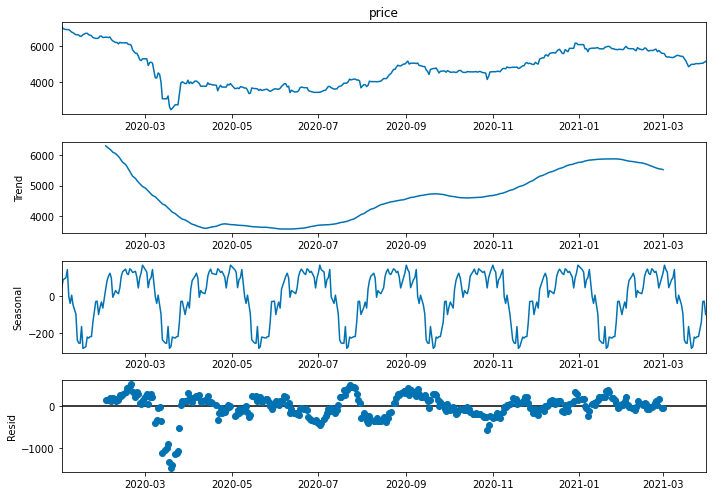

In [227]:
plt.figure(figsize=(20, 10))
dec = seasonal_decompose(cb['price'], period = 52).plot()
plt.show()

# Stationarity of time serie

## Augmented Dickey-Fuller Test
Augmented Dickey-Fuller Test is a common statistical test used to test whether a given Time series is stationary or not. We can achieve this by defining the null and alternate hypothesis.

Null Hypothesis: Time Series is no stationary. It gives a time-dependent trend.

Alternate Hypothesis: Time Series is stationary. In another term, the series doesn’t depend on time.

ADF or t Statistic < critical values: Accept the alternative hypothesis. Time series is stationary.

ADF or t Statistic > critical values: Failed to reject the null hypothesis. The time series is non-stationary

if p-value is not less than .05 (depend on the alpha), we fail to reject the null hypothesis. This means the time series is non-stationary.

In [176]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [207]:
def check_stationarity_ADF(serie):
    result = adfuller(serie)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print ("Reject Ho - and the Time Series is Stationary")
    else:
         print ("Failed to Reject Ho -and the Time Series is Non-Stationary")

In [208]:
def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

## KPSS Test

Unlike KPSS test, the null hypothesis is the series is stationary. Based upon the significance level of 0.05 and the p-value of KPSS test, if if P < 0.05 , there is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test. otherwise, the serie is stationary.

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Here, due to the difference in the results from ADF test and KPSS test, it can be inferred that the series is trend stationary and not strict stationary. The series can be detrended by differencing or by model fitting

In [209]:
def kpss_test(series, sig=0.05, name=''):
    statistic, p_value, n_lags, critical_values = kpss(series, nlags='auto')    
    p_value = round(p_value, 3) 
    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Non Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => stationary.")

In [228]:
cb.head(2)

Country      price
Date              
2020-01-02  7120.0
2020-01-03  7000.0

In [230]:
adfuller_test(cb.price, sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.173 => Non-stationary.


In [231]:
kpss_test(cb.price, sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.012 => Non Stationary. 


In [214]:
adfuller_test(cb['price'].diff().dropna(), sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.0 => Stationary. 


In [232]:
kpss_test(cb.price.diff().diff().dropna(), sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.1 => stationary.


In [216]:

def plot_correlations(serie):
    fig, ax = plt.subplots(figsize=(8, 5))
    _ = plot_acf(serie, ax=ax)
    fig, ax = plt.subplots(figsize=(8, 5))
    _ = plot_pacf(serie, ax=ax)

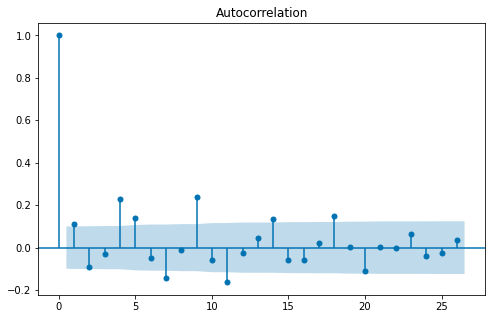

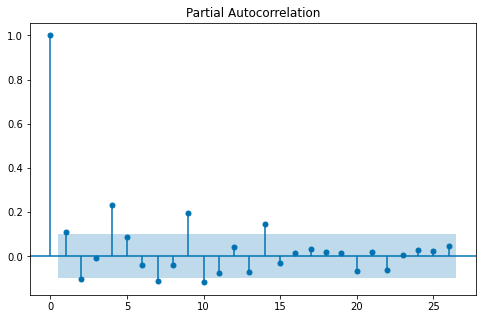

In [233]:
plot_correlations(cb.price.diff().dropna())

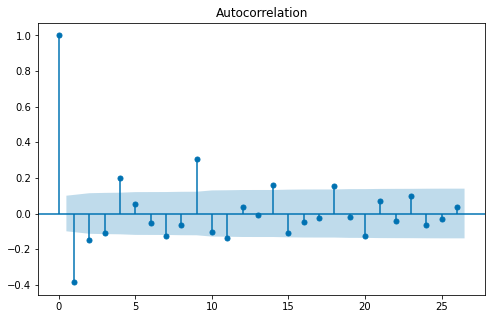

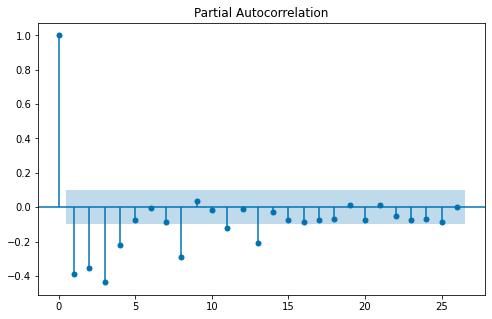

In [234]:
plot_correlations(cb.price.diff().diff().dropna())

In [240]:
# Split the data into a train and test set
def train_test(df):
    train = df.loc[:'2020']
    test = df.loc['2021':]
    return train, test 

In [241]:
def plot_price_vol(train, test, col): # df is train or test
    # Create an axis
    fig, ax = plt.subplots(figsize=(15,8))

    # Plot the train and test sets on the axis ax
    train[[col]].plot(ax=ax)
    test[[col]].plot(ax=ax)
    ax.set_title( col + ' ' + 'train and test set', fontsize=20)
    plt.show()

In [246]:
cb.columns,  cb.index

(Index(['price'], dtype='object', name='Country'),
 DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-05', '2020-01-06',
                '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
                '2020-01-12', '2020-01-13',
                ...
                '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
                '2021-03-25', '2021-03-26', '2021-03-28', '2021-03-29',
                '2021-03-30', '2021-03-31'],
               dtype='datetime64[ns]', name='Date', length=387, freq=None))

In [276]:
cb.loc[:'2020'].head()

Country      price
Date              
2020-01-02  7120.0
2020-01-03  7000.0
2020-01-05  6950.0
2020-01-06  6950.0
2020-01-07  6950.0

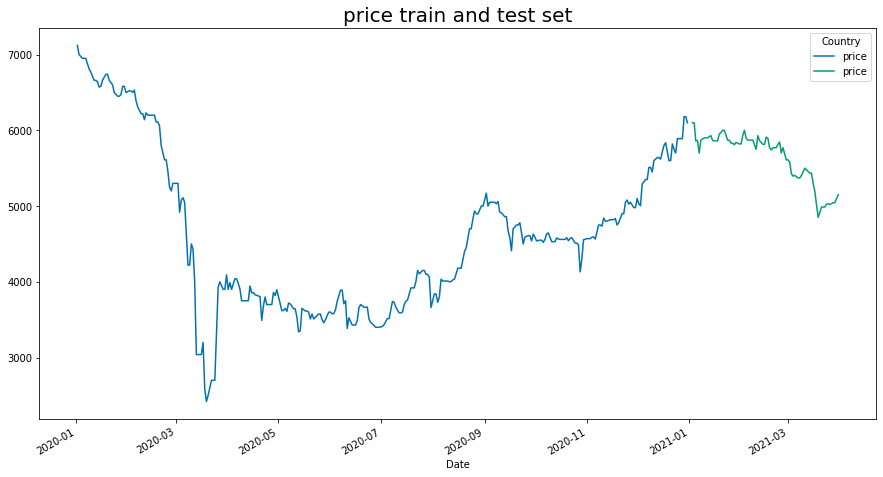

In [247]:
# split data into test and train set
train, test = train_test(cb)
# plot the train and test set
plot_price_vol(train, test, 'price')

In [248]:
len(cb), len(train), len(test)

(387, 310, 77)

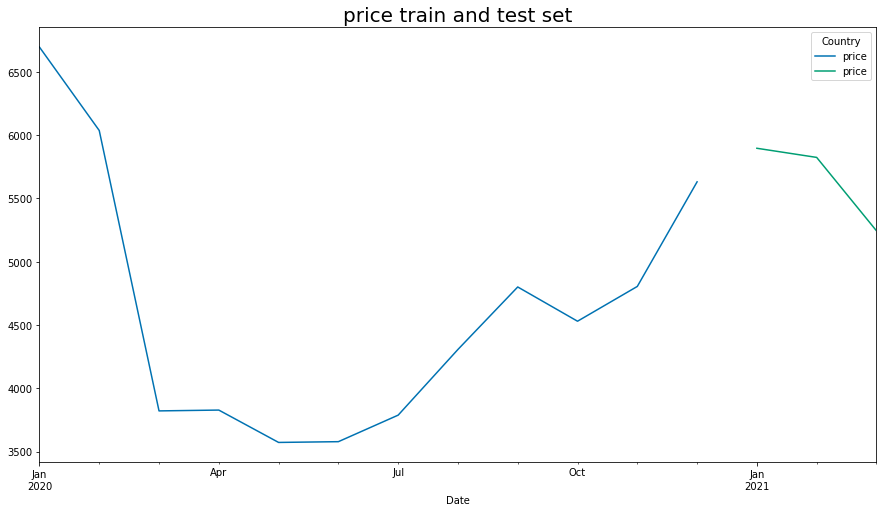

In [249]:
#resample the dataset , split and plot 
# split data into test and train set

trainm, testm = train_test(cb.resample('M').mean().dropna())

# plot the train and test set
plot_price_vol(trainm, testm, 'price')

In [ ]:

#import pmdarima as pm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def find_order(train, column, p, q, d):
    import warnings
    warnings.filterwarnings("ignore")
    # Create empty list to store search results
    order_aic_bic=[]

    # Loop over p values 
    for p in range(0,9):
      # Loop over q values 
        for q in range(0,2):
             # Loop over d values 
            for d in range(0,1): 
                try:
                # create and fit ARMA(p,q) model
                    model = SARIMAX(train[[col]], order=(p,d,q))
                    results = model.fit()    
                # Append order and results tuple
                    order_aic_bic.append((p,q,d, results.aic, results.bic))
                except:
                    print(p, q, None, None)
                    #continue
    # Construct DataFrame from order_aic_bic
    order_df = pd.DataFrame(order_aic_bic,columns=['p', 'q','d', 'AIC', 'BIC'])

    # Print order_df in order of increasing AIC
    #order_df.sort_values('AIC').head(2)
    # Print order_df in order of increasing BIC
    #order_df.sort_values('BIC').head(2)
    
    return order_df

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values 
for p in range(0,9):
  # Loop over q values 
    for q in range(0,9):
         # Loop over d values 
        for d in range(0,3): 
            try:
            # create and fit ARMA(p,q) model
                model = SARIMAX(train[['price']], order=(p,d,q))
                results = model.fit()    
            # Append order and results tuple
                order_aic_bic.append((p,q,d, results.aic, results.bic))
            except:
                print(p, q, None, None)
                #continue
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q','d', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
order_df.sort_values('AIC').head(2)

p  q  d          AIC          BIC
227  8  3  2  3896.793258  3941.554455
212  7  7  2  3898.438332  3954.389829

In [ ]:
# Print order_df in order of increasing AIC
order_df.sort_values('AIC').head(5)
order_df.sort_values('AIC').tail(5)

p  q  d          AIC          BIC
227  8  3  2  3896.793258  3941.554455
212  7  7  2  3898.438332  3954.389829
215  7  8  2  3898.449336  3958.130932
206  7  5  2  3898.482302  3946.973599
152  5  5  2  3898.903074  3939.934171

p  q  d          AIC          BIC
12  0  4  0  5021.187530  5039.870392
9   0  3  0  5099.505700  5114.451990
6   0  2  0  5486.016208  5497.225925
3   0  1  0  5712.342758  5719.815903
0   0  0  0  6128.124635  6131.861207

In [ ]:
order_aic_bicm=[]

# Loop over p values 
for p in range(0,9):
  # Loop over q values 
    for q in range(0,9):
         # Loop over d values 
        for d in range(0,3): 
            try:
            # create and fit ARMA(p,q) model
                model = SARIMAX(trainm[['price']], order=(p,d,q))
                results = model.fit()    
            # Append order and results tuple
                order_aic_bicm.append((p,q,d, results.aic, results.bic))
            except:
                print(p, q, None, None)
                #continue
# Construct DataFrame from order_aic_bic
order_dfm = pd.DataFrame(order_aic_bicm, 
                        columns=['p', 'q','d', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
order_dfm.sort_values('AIC').head(5)

1 3 None None
1 3 None None
2 3 None None
2 3 None None
3 1 None None
3 2 None None
3 3 None None
3 3 None None
4 2 None None
4 3 None None
4 3 None None
5 3 None None
5 3 None None
6 0 None None
6 0 None None
6 0 None None
6 3 None None
6 3 None None
7 3 None None
7 3 None None
8 0 None None
8 1 None None
8 2 None None
8 3 None None
8 3 None None


p  q  d         AIC         BIC
129  5  1  2   14.000000   16.118096
199  8  1  1   20.000000   23.978953
198  8  1  0   20.000000   24.849066
11   0  3  2  164.717545  165.927885
54   2  0  2  166.139977  167.047732

In [ ]:
import numpy as np

In [ ]:
def sarimax_fit_plot_sum(trainm, col, p,q,d):
    # Fit model
    model_1 = SARIMAX(trainm[[col]], 
                      order=(p,d,q), 
                      trend='c')
    results_1 = model_1.fit()
    mae = np.mean(np.abs(results_1.resid)) # mean absolute error from residuals
    Summary= results_1.summary()
    # Make plot of time series for comparison #  four plots, shows us the distribution of the residuals
    Diagnostic = results_1.plot_diagnostics()
    plt.show()
    return Diagnostic, results_1, mae, Summary

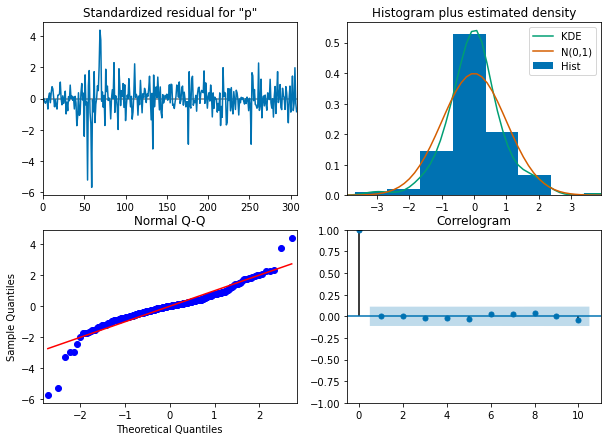

In [ ]:
Diagnostic, results_1, mae, Summary = sarimax_fit_plot_sum(train, 'price', 8,3,2)

In [ ]:
def sarimax_fit_plot_sum(trainm, col, p,q,d):
    # Fit model
    model_1 = SARIMAX(trainm[[col]], 
                      order=(p,d,q), 
                      trend='c')
    results_1 = model_1.fit()
    mae = np.mean(np.abs(results_1.resid)) # mean absolute error from residuals
    Summary= results_1.summary()
    # Make plot of time series for comparison #  four plots, shows us the distribution of the residuals
    Diagnostic = results_1.plot_diagnostics()
    plt.show()
    return Diagnostic, results_1, mae, Summary

In [ ]:
trainm[['price']]

Country      price
Date              
2020-01-02  7120.0
2020-01-03  7000.0
2020-01-05  6950.0
2020-01-06  6950.0
2020-01-07  6950.0
...            ...
2020-12-27  5890.0
2020-12-28  5890.0
2020-12-29  6180.0
2020-12-30  6180.0
2020-12-31  6100.0

[310 rows x 1 columns]

In [ ]:
model_1 = SARIMAX(trainm[['price']], 
                      order=(p,d,q), 
                      trend='c')
results_1 = model_1.fit()

In [ ]:
mae = np.mean(np.abs(results_1.resid)) # mean absolute error from residuals
Summary= results_1.summary()
#Summary

In [ ]:
results_1

ValueError: ignored

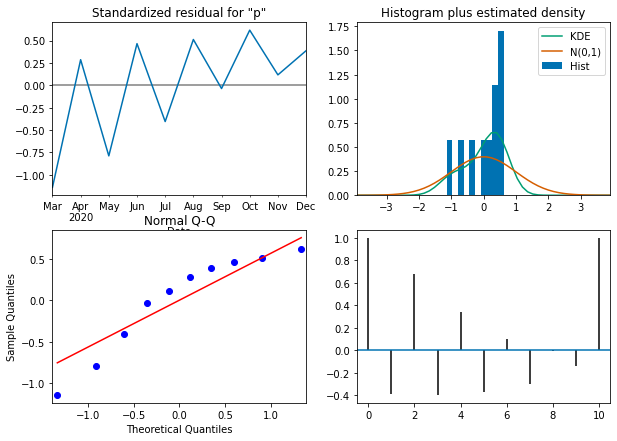

In [ ]:
Diagnostic = results_1.plot_diagnostics()
plt.show()

LinAlgError: ignored

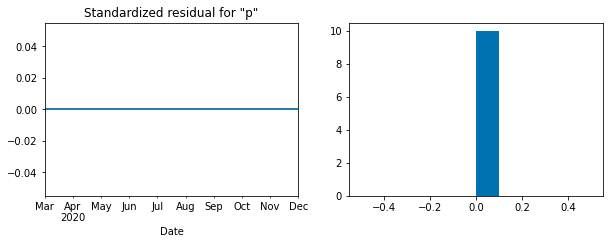

In [ ]:
Diagnostic, results_1, mae, Summary = sarimax_fit_plot_sum(trainm, 'price', 5,1,2)

In [ ]:
def sarimax_plot_origin_pred(trainm, col, p, d, q): # work with monthly and daily
    model_1 = SARIMAX(trainm[[col]],order=(p,d,q), trend='c')
    results_1 = model_1.fit()
    #Visualize the original dataset plotted against our model.
    fig, ax = plt.subplots(figsize=(10,7))  
    tr = trainm[col].plot(ax=ax)
    pred = results_1.predict().plot(ax=ax, color = 'red')#model_ny_con_fit
    
    plt.show()
    
    return tr, pred

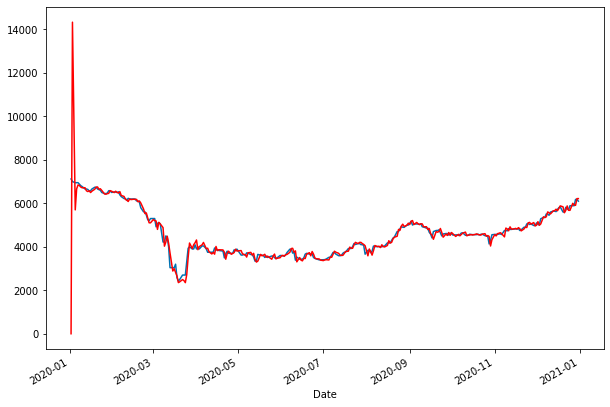

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7583f225e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7583f225e0>)

In [ ]:
sarimax_plot_origin_pred(train, 'price', 8, 3, 2)

# Stock Market Predictions with LSTM

Long Short-Term Memory (LSTM) models are powerful, especially for retaining a long-term memory, by design, as you will see later. are extremely powerful time-series models. They can predict an arbitrary number of steps into the future. 
LSTM is suitable for processing Sequential Data.

## Colombia stock 

In [178]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [250]:
df.head()

Price    Open    High     Low  Change % Country      volume  \
Date                                                                       
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0   
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0   
2021-03-29  293.30  289.72  294.09  289.26    0.0071  Russia  43680000.0   
2021-03-26  291.22  288.63  292.75  288.32    0.0159  Russia  56070000.0   
2021-03-25  286.66  286.50  287.03  283.85    0.0030  Russia  35220000.0   

            shifted    change    return  pct_return_3d  
Date                                                    
2021-03-31      NaN       NaN       NaN            NaN  
2021-03-30   291.02  1.007663  0.766270       0.766270  
2021-03-29   293.25  1.000171  0.017050       0.017050  
2021-03-26   293.30  0.992908 -0.709171      -0.709171  
2021-03-25   291.22  0.984342 -1.565827      -1.565827

In [184]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Change %', 'Country', 'volume',
       'shifted', 'change', 'return', 'pct_return_3d'],
      dtype='object')

In [182]:
df.Country.unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

In [252]:
dff=df[['Price', 'Open', 'High', 'Low', 'Change %', 'Country', 'volume']].copy().reset_index()
cbb = dff[dff['Country']=='Colombia']
cbb.drop(columns='Country', inplace=True)
cbb.reset_index(inplace=True, drop=True)
cbb.head()

Date   Price    Open    High     Low  Change %    volume
0 2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0
1 2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0
2 2021-03-29  5045.0  5020.0  5045.0  5015.0    0.0050  117540.0
3 2021-03-26  5020.0  5085.0  5085.0  4980.0   -0.0020  203460.0
4 2021-03-25  5030.0  5035.0  5045.0  4950.0    0.0010  317060.0

In [254]:
cbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      303 non-null    datetime64[ns]
 1   Price     303 non-null    float64       
 2   Open      303 non-null    float64       
 3   High      303 non-null    float64       
 4   Low       303 non-null    float64       
 5   Change %  303 non-null    float64       
 6   volume    303 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.7 KB


In [189]:
cbb.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
volume      0
dtype: int64

In [257]:
cbb.shape[0]

303

In [258]:
cbb['Date'].loc[::303]

0   2021-03-31
Name: Date, dtype: datetime64[ns]

<Figure size 1296x648 with 0 Axes>

(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Mid Price')

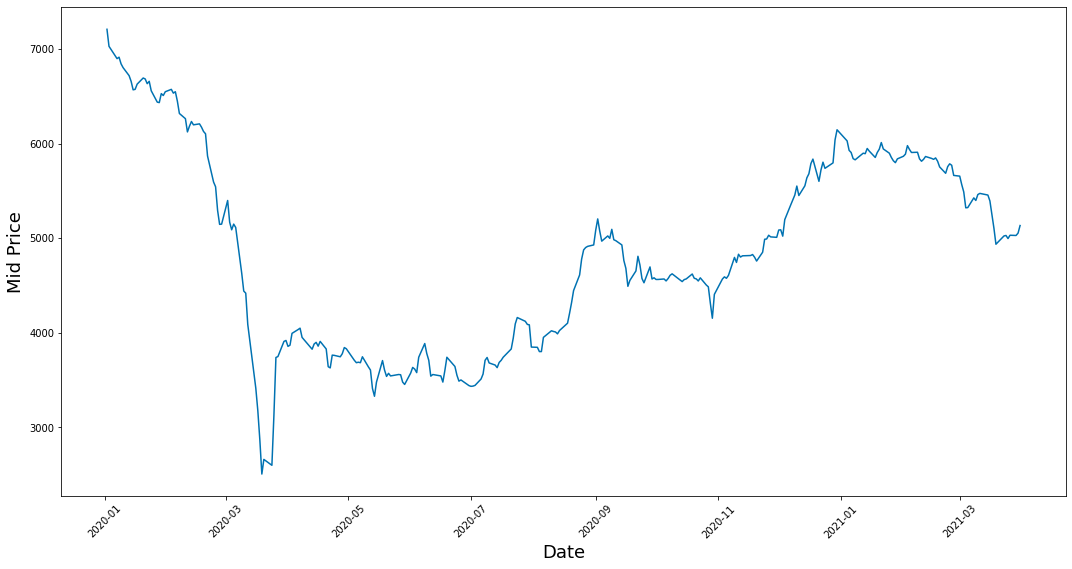

In [259]:
# 
plt.figure(figsize = (18,9))
plt.plot(cbb.Date,(cbb['Low']+cbb['High'])/2.0)
#plt.plot(cb.Date,(cb['Open'])
plt.xticks(rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

##  one

https://cnvrg.io/pytorch-lstm/


https://github.com/abhinav-TB/Time-Series-Forecasting-Using-LSTM

In [261]:
cbb.head()

Date   Price    Open    High     Low  Change %    volume
0 2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0
1 2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0
2 2021-03-29  5045.0  5020.0  5045.0  5015.0    0.0050  117540.0
3 2021-03-26  5020.0  5085.0  5085.0  4980.0   -0.0020  203460.0
4 2021-03-25  5030.0  5035.0  5045.0  4950.0    0.0010  317060.0

In [262]:
cbb.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %', 'volume'], dtype='object')

In [263]:
cbd = cbb.set_index('Date')
cbd.head(2)

Price    Open    High     Low  Change %    volume
Date                                                          
2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0
2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0

In [264]:
cbd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 2021-03-31 to 2020-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     303 non-null    float64
 1   Open      303 non-null    float64
 2   High      303 non-null    float64
 3   Low       303 non-null    float64
 4   Change %  303 non-null    float64
 5   volume    303 non-null    float64
dtypes: float64(6)
memory usage: 16.6 KB


In [265]:
X = cbd.iloc[:, :1]
y = cbd.iloc[:, 1:]
X.head(2)
y.head(2)

Price
Date              
2021-03-31  5150.0
2021-03-30  5100.0

Open    High     Low  Change %    volume
Date                                                  
2021-03-31  5100.0  5170.0  5100.0    0.0098  212440.0
2021-03-30  5010.0  5100.0  5010.0    0.0109  583700.0

In [285]:
# Split the data into a train and test set
def train_test(df):
    train = df.loc['2020']
    test = df.loc['2021']
    return train, test 

In [287]:
#train and test dataframe 
train, test = train_test(cbd)
len(train), len(test)

(242, 61)

In [288]:
X_trainn = train.iloc[:, 1:]
X_testt = test.iloc[:, 1:]
y_trainn = train.iloc[:, :1]
y_testt = test.iloc[:, :1]

In [268]:
#X_trainn = cbd[cbd['year']== 2020].iloc[:, 1:]
#X_testt = cbd[cbd['year']== 2021].iloc[:, 1:]
#y_trainn = cbd[cbd['year']== 2020].iloc[:, :1]
#y_testt = cbd[cbd['year']== 2021].iloc[:, :1]

In [289]:
len(X_trainn), len(X_testt), len(y_trainn), len(y_testt)

(242, 61, 242, 61)

In [290]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_train = ss.fit_transform(X_trainn)
y_train = mm.fit_transform(y_trainn) 
X_test = ss.fit_transform(X_testt)
y_test = mm.fit_transform(y_testt)

In [291]:
X_train[:2], y_train[:2]

(array([[ 1.47225008,  1.51245282,  1.40037982, -0.00391113,  0.06069051],
        [ 1.20350316,  1.42019339,  1.28506241,  1.20563389,  0.34409798]]),
 array([[0.8],
        [0.8]]))

In [292]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (242, 5) (242, 1)
Testing Shape (61, 5) (61, 1)


In [293]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [294]:
# convert the Numpy Arrays to Tensors and to Variables 
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

In [295]:
X_train_tensors

tensor([[ 1.4723,  1.5125,  1.4004, -0.0039,  0.0607],
        [ 1.2035,  1.4202,  1.2851,  1.2056,  0.3441],
        [ 1.0163,  1.1386,  1.0977,  0.8147, -0.3323],
        ...,
        [ 2.2113,  2.1680,  2.1980, -0.1785, -0.5480],
        [ 2.2977,  2.3137,  2.3037, -0.4194, -0.1674],
        [ 2.5472,  2.5079,  2.4575, -0.6111, -0.5855]])

In [296]:
#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

In [297]:
#Now you can confirm the shape of the dataset via printing the shapes.
print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape)

Training Shape torch.Size([242, 1, 5]) torch.Size([242, 1])
Testing Shape torch.Size([61, 1, 5]) torch.Size([61, 1])


In [298]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [301]:
num_epochs = 5000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 5 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers or Number of recurrent layers

num_classes = 1 #number of output classes 

In [302]:
X_train_tensors_final.shape

torch.Size([242, 1, 5])

In [303]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

In [304]:
lstm1

LSTM1(
  (lstm): LSTM(5, 2, batch_first=True)
  (fc_1): Linear(in_features=2, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [305]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [306]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.11495
Epoch: 100, loss: 0.00383
Epoch: 200, loss: 0.00093
Epoch: 300, loss: 0.00050
Epoch: 400, loss: 0.00033
Epoch: 500, loss: 0.00025
Epoch: 600, loss: 0.00020
Epoch: 700, loss: 0.00017
Epoch: 800, loss: 0.00014
Epoch: 900, loss: 0.00013
Epoch: 1000, loss: 0.00012
Epoch: 1100, loss: 0.00011
Epoch: 1200, loss: 0.00011
Epoch: 1300, loss: 0.00010
Epoch: 1400, loss: 0.00010
Epoch: 1500, loss: 0.00010
Epoch: 1600, loss: 0.00010
Epoch: 1700, loss: 0.00010
Epoch: 1800, loss: 0.00010
Epoch: 1900, loss: 0.00010
Epoch: 2000, loss: 0.00009
Epoch: 2100, loss: 0.00009
Epoch: 2200, loss: 0.00009
Epoch: 2300, loss: 0.00009
Epoch: 2400, loss: 0.00009
Epoch: 2500, loss: 0.00009
Epoch: 2600, loss: 0.00009
Epoch: 2700, loss: 0.00009
Epoch: 2800, loss: 0.00009
Epoch: 2900, loss: 0.00009
Epoch: 3000, loss: 0.00009
Epoch: 3100, loss: 0.00009
Epoch: 3200, loss: 0.00009
Epoch: 3300, loss: 0.00009
Epoch: 3400, loss: 0.00009
Epoch: 3500, loss: 0.00009
Epoch: 3600, loss: 0.00009
Epoch: 3700, 

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Time-Series Prediction')

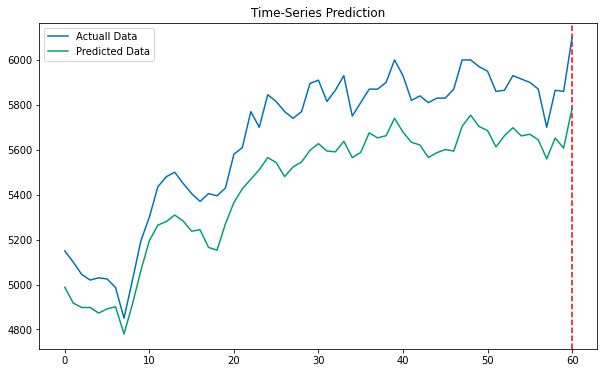

In [307]:
train_predict = lstm1(X_test_tensors_final)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = y_test_tensors.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=60, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# two